<a href="https://colab.research.google.com/github/tieukhoimai/human-development-analysis/blob/main/Human_Development_Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
cd /content/drive/MyDrive/vrn/human-development-analysis/data

/content/drive/MyDrive/vrn/human-development-analysis/data


# Load Dataset

In [79]:
df = pd.read_csv('dataset.csv', encoding='latin-1')
df

iso3                          country    hdicode region  \
0          AFG                      Afghanistan        Low     SA   
1          ALB                          Albania       High    ECA   
2          DZA                          Algeria       High     AS   
3          AND                          Andorra  Very High    NaN   
4          AGO                           Angola     Medium    SSA   
..         ...                              ...        ...    ...   
201    ZZG.ECA          Europe and Central Asia        NaN    NaN   
202    ZZH.LAC  Latin America and the Caribbean        NaN    NaN   
203     ZZI.SA                       South Asia        NaN    NaN   
204    ZZJ.SSA               Sub-Saharan Africa        NaN    NaN   
205  ZZK.WORLD                            World        NaN    NaN   

     hdi_rank_2022  hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  ...  \
0            182.0     0.284     0.292     0.299     0.307     0.300  ...   
1             74.0     0.649     0.632     0.616     0.618     0.623  ...   
2             93.0     0.593     0.596     0.601     0.602     0.603  ...   
3             35.0       NaN       NaN       NaN       NaN       NaN  ...   
4            150.0       NaN       NaN       NaN       NaN       NaN  ...   
..             ...       ...       ...       ...       ...       ...  ...   
201            NaN     0.663     0.660     0.654     0.650     0.646  ...   
202            NaN     0.637     0.642     0.646     0.650     0.655  ...   
203            NaN     0.444     0.448     0.454     0.458     0.462  ...   
204            NaN     0.404     0.408     0.407     0.409     0.411  ...   
205            NaN     0.601     0.604     0.607     0.610     0.614  ...   

     pop_total_2013  pop_total_2014  pop_total_2015  pop_total_2016  \
0         31.541208       32.716210       33.753499       34.636207   
1          2.887014        2.884102        2.882480        2.881063   
2         38.000627       38.760168       39.543154       40.339329   
3          0.071366        0.071622        0.071746        0.072540   
4         26.147002       27.128336       28.127721       29.154746   
..              ...             ...             ...             ...   
201      234.825401      237.279742      239.778976      242.142492   
202      605.055728      611.510016      617.905054      624.225911   
203     1810.142830     1833.991975     1857.336021     1880.378880   
204      906.292042      931.231681      956.799811      982.521965   
205     7216.669035     7305.019589     7392.538689     7479.354532   

     pop_total_2017  pop_total_2018  pop_total_2019  pop_total_2020  \
0         35.643417       36.686784       37.769498       38.972231   
1          2.879355        2.877013        2.873883        2.866849   
2         41.136546       41.927007       42.705368       43.451666   
3          0.073836        0.075013        0.076343        0.077700   
4         30.208628       31.273533       32.353588       33.428486   
..              ...             ...             ...             ...   
201      244.135198      245.715346      247.230900      248.627951   
202      630.391565      636.273438      641.826122      646.831902   
203     1903.436594     1926.062367     1948.009380     1969.617892   
204     1008.377044     1035.029964     1062.372696     1090.363459   
205     7565.663198     7649.567694     7730.660623     7806.602793   

     pop_total_2021  pop_total_2022  
0         40.099462       41.128771  
1          2.854710        2.842321  
2         44.177968       44.903225  
3          0.079034        0.079824  
4         34.503774       35.588987  
..              ...             ...  
201      249.859632      247.791584  
202      651.100945      655.268078  
203     1989.452478     2007.549714  
204     1118.480023     1146.742474  
205     7874.877719     7940.608797  

[206 rows x 1076 columns]

In [80]:
metadata = pd.read_csv('metadata.csv')
metadata

Full name         Short name  \
0                                                ISO3               iso3   
1                                    HDR Country Name            country   
2                            Human Development Groups            hdicode   
3                            UNDP Developeing Regions             region   
4                                            HDI Rank           hdi_rank   
5                     Human Development Index (value)                hdi   
6                    Life Expectancy at Birth (years)                 le   
7                 Expected Years of Schooling (years)                eys   
8                     Mean Years of Schooling (years)                mys   
9        Gross National Income Per Capita (2017 PPP$)              gnipc   
10                                          GDI Group          gdi_group   
11                   Gender Development Index (value)                gdi   
12                                         HDI female              hdi_f   
13           Life Expectancy at Birth, female (years)               le_f   
14        Expected Years of Schooling, female (years)              eys_f   
15            Mean Years of Schooling, female (years)              mys_f   
16  Gross National Income Per Capita, female (2017...           gni_pc_f   
17                                           HDI male              hdi_m   
18             Life Expectancy at Birth, male (years)               le_m   
19          Expected Years of Schooling, male (years)              eys_m   
20              Mean Years of Schooling, male (years)              mys_m   
21  Gross National Income Per Capita, male (2017 P...           gni_pc_m   
22  Inequality-adjusted Human Development Index (v...               ihdi   
23                    Coefficient of human inequality          coef_ineq   
24                                   Overall loss (%)               loss   
25                      Inequality in life expectancy            ineq_le   
26                             Inequality in eduation           ineq_edu   
27                               Inequality in income           ineq_inc   
28                                           GII Rank           gii_rank   
29                    Gender Inequality Index (value)                gii   
30  Maternal Mortality Ratio (deaths per 100,000 l...                mmr   
31  Adolescent Birth Rate (births per 1,000 women ...                abr   
32  Population with at least some secondary educat...               se_f   
33  Population with at least some secondary educat...               se_m   
34  Share of seats in parliament, female (% held b...               pr_f   
35  Share of seats in parliament, male (% held by ...               pr_m   
36  Labour force participation rate, female (% age...             lfpr_f   
37  Labour force participation rate, male (% ages ...             lfpr_m   
38                           Difference from HDI rank  rankdiff_hdi_phdi   
39  Planetary pressures–adjusted Human Development...               phdi   
40                      Difference from HDI value (%)      diff_hdi_phdi   
41  Carbon dioxide emissions per capita (productio...           co2_prod   
42             Material footprint per capita (tonnes)                 mf   
43                       Population, total (millions)          pop_total   

                  Time series  
0                           -  
1                           -  
2                           -  
3                           -  
4                        2022  
5                   1990-2022  
6                   1990-2022  
7                   1990-2022  
8                   1990-2022  
9                   1990-2022  
10                       2022  
11                  1990-2022  
12                  1990-2022  
13                  1990-2022  
14                  1990-2022  
15                  1990-2022  
16                  1990-2022  
17                  1990-2022  
18             

# Data Pre-processing

## Create Dictionary for metadata

In [81]:
meta_dict = metadata.set_index('Short name').to_dict()['Full name']
meta_dict

{'iso3': 'ISO3',
 'country': 'HDR Country Name',
 'hdicode': 'Human Development Groups',
 'region': 'UNDP Developeing Regions',
 'hdi_rank': 'HDI Rank',
 'hdi': 'Human Development Index (value)',
 'le': 'Life Expectancy at Birth (years)',
 'eys': 'Expected Years of Schooling (years)',
 'mys': 'Mean Years of Schooling (years)',
 'gnipc': 'Gross National Income Per Capita (2017 PPP$)',
 'gdi_group': 'GDI Group',
 'gdi': 'Gender Development Index (value)',
 'hdi_f': 'HDI female',
 'le_f': 'Life Expectancy at Birth, female (years)',
 'eys_f': 'Expected Years of Schooling, female (years)',
 'mys_f': 'Mean Years of Schooling, female (years)',
 'gni_pc_f': 'Gross National Income Per Capita, female (2017 PPP$)',
 'hdi_m': 'HDI male',
 'le_m': 'Life Expectancy at Birth, male (years)',
 'eys_m': 'Expected Years of Schooling, male (years)',
 'mys_m': 'Mean Years of Schooling, male (years)',
 'gni_pc_m': 'Gross National Income Per Capita, male (2017 PPP$)',
 'ihdi': 'Inequality-adjusted Human Deve

## Create list of country-region

In [82]:
country_df = df[['country']][:195]
unique_country = country_df['country'].unique()

In [83]:
country_region_df = df[['iso3','region']][:195]
country_region_df

iso3 region
0    AFG     SA
1    ALB    ECA
2    DZA     AS
3    AND    NaN
4    AGO    SSA
..   ...    ...
190  VEN    LAC
191  VNM    EAP
192  YEM     AS
193  ZMB    SSA
194  ZWE    SSA

[195 rows x 2 columns]

In [133]:
# converting the dataframe to a dictionary
country_region_dict = country_region_df.set_index('iso3')\
                        .to_dict()['region']
# country_region_dict

In [85]:
region_df = df[['iso3','country']][199:]
region_df['iso3'] = region_df['iso3'].str.split('.').str[-1]
region_df

iso3                          country
199     AS                      Arab States
200    EAP        East Asia and the Pacific
201    ECA          Europe and Central Asia
202    LAC  Latin America and the Caribbean
203     SA                       South Asia
204    SSA               Sub-Saharan Africa
205  WORLD                            World

In [134]:
region_code_dict = region_df.set_index('iso3')\
                        .to_dict()['country']
# region_code_dict

In [132]:
for country, region_code in country_region_dict.items():
    if region_code in region_code_dict:
        country_region_dict[country] = region_code_dict[region_code]
    else:
        country_region_dict[country] = region_code

# country_region_dict

## Convert data from Wide Formated to Long Formated

In [88]:
general_predictors = ['iso3','country']

selected_predictors = [
    'hdi','le','eys','mys','gnipc', # hdi overall
    # 'hdi_f','le_f','eys_f','mys_f','gni_pc_f', # hdi female
    # 'hdi_m','le_m','eys_m','mys_m','gni_pc_m', # hdi male'
    # 'ihdi','coef_ineq','loss','ineq_le','ineq_edu','ineq_inc','gii'  # inequality
]

In [89]:
years = list(range(1990, 2023))
selected_columns = [
    f'{pred}_{year}' for pred in selected_predictors for year in years]

df_long = pd.melt(df, id_vars=general_predictors,
                  value_vars=selected_columns,
                  var_name='variable',
                  value_name='value')

# Extract year and variable type from the 'variable' column
df_long['year'] = df_long['variable'].str.extract('(\d{4})')
df_long['variable'] = df_long['variable'].str.extract('([a-z_]+)')

# Pivot the dataframe to get the desired format
df_final = df_long.pivot_table(index=general_predictors + ['year'],
                               columns='variable',
                               values='value',
                               aggfunc='first'
                               ).reset_index()

# Flatten the column index
df_final.columns.name = None
df_final.columns = [col[:-1] if col.endswith('_') else col for col in df_final.columns]

In [90]:
df_final

iso3      country  year        eys         gnipc    hdi         le  \
0           AFG  Afghanistan  1990   2.936460   3115.670448  0.284  45.967000   
1           AFG  Afghanistan  1991   3.228456   2817.304736  0.292  46.663000   
2           AFG  Afghanistan  1992   3.520452   2474.681985  0.299  47.596000   
3           AFG  Afghanistan  1993   3.812448   1723.019763  0.307  51.466000   
4           AFG  Afghanistan  1994   4.104445   1202.010488  0.300  51.495000   
...         ...          ...   ...        ...           ...    ...        ...   
6793  ZZK.WORLD        World  2018  12.651182  16431.285550  0.735  72.816178   
6794  ZZK.WORLD        World  2019  12.726141  16713.676430  0.739  73.012121   
6795  ZZK.WORLD        World  2020  12.860674  16015.845830  0.736  72.257355   
6796  ZZK.WORLD        World  2021  12.911840  16837.841800  0.735  71.365524   
6797  ZZK.WORLD        World  2022  12.989766  17254.434040  0.739  72.004070   

           mys  
0     0.871962  
1     0.915267  
2     0.958573  
3     1.001878  
4     1.045184  
...        ...  
6793  8.483187  
6794  8.574383  
6795  8.686374  
6796  8.682265  
6797  8.661598  

[6798 rows x 8 columns]

In [91]:
# add region to the final dataframe

df_final['region'] = df_final['iso3'].map(country_region_dict)
df_final

iso3      country  year        eys         gnipc    hdi         le  \
0           AFG  Afghanistan  1990   2.936460   3115.670448  0.284  45.967000   
1           AFG  Afghanistan  1991   3.228456   2817.304736  0.292  46.663000   
2           AFG  Afghanistan  1992   3.520452   2474.681985  0.299  47.596000   
3           AFG  Afghanistan  1993   3.812448   1723.019763  0.307  51.466000   
4           AFG  Afghanistan  1994   4.104445   1202.010488  0.300  51.495000   
...         ...          ...   ...        ...           ...    ...        ...   
6793  ZZK.WORLD        World  2018  12.651182  16431.285550  0.735  72.816178   
6794  ZZK.WORLD        World  2019  12.726141  16713.676430  0.739  73.012121   
6795  ZZK.WORLD        World  2020  12.860674  16015.845830  0.736  72.257355   
6796  ZZK.WORLD        World  2021  12.911840  16837.841800  0.735  71.365524   
6797  ZZK.WORLD        World  2022  12.989766  17254.434040  0.739  72.004070   

           mys      region  
0     0.871962  South Asia  
1     0.915267  South Asia  
2     0.958573  South Asia  
3     1.001878  South Asia  
4     1.045184  South Asia  
...        ...         ...  
6793  8.483187         NaN  
6794  8.574383         NaN  
6795  8.686374         NaN  
6796  8.682265         NaN  
6797  8.661598         NaN  

[6798 rows x 9 columns]

In [92]:
# rearaange the columns and normalize the iso3 column

data = df_final[['iso3', 'country', 'region', 'year'] + selected_predictors]
data['year'] = data['year'].astype(int)
data['iso3'] = data['iso3'].str.split('.').str[-1]
data

iso3      country      region  year    hdi         le        eys  \
0       AFG  Afghanistan  South Asia  1990  0.284  45.967000   2.936460   
1       AFG  Afghanistan  South Asia  1991  0.292  46.663000   3.228456   
2       AFG  Afghanistan  South Asia  1992  0.299  47.596000   3.520452   
3       AFG  Afghanistan  South Asia  1993  0.307  51.466000   3.812448   
4       AFG  Afghanistan  South Asia  1994  0.300  51.495000   4.104445   
...     ...          ...         ...   ...    ...        ...        ...   
6793  WORLD        World         NaN  2018  0.735  72.816178  12.651182   
6794  WORLD        World         NaN  2019  0.739  73.012121  12.726141   
6795  WORLD        World         NaN  2020  0.736  72.257355  12.860674   
6796  WORLD        World         NaN  2021  0.735  71.365524  12.911840   
6797  WORLD        World         NaN  2022  0.739  72.004070  12.989766   

           mys         gnipc  
0     0.871962   3115.670448  
1     0.915267   2817.304736  
2     0.958573   2474.681985  
3     1.001878   1723.019763  
4     1.045184   1202.010488  
...        ...           ...  
6793  8.483187  16431.285550  
6794  8.574383  16713.676430  
6795  8.686374  16015.845830  
6796  8.682265  16837.841800  
6797  8.661598  17254.434040  

[6798 rows x 9 columns]

In [93]:
# data.to_csv('data/cleaned_dataset.csv', index=False)

# Statistical

## Correlation

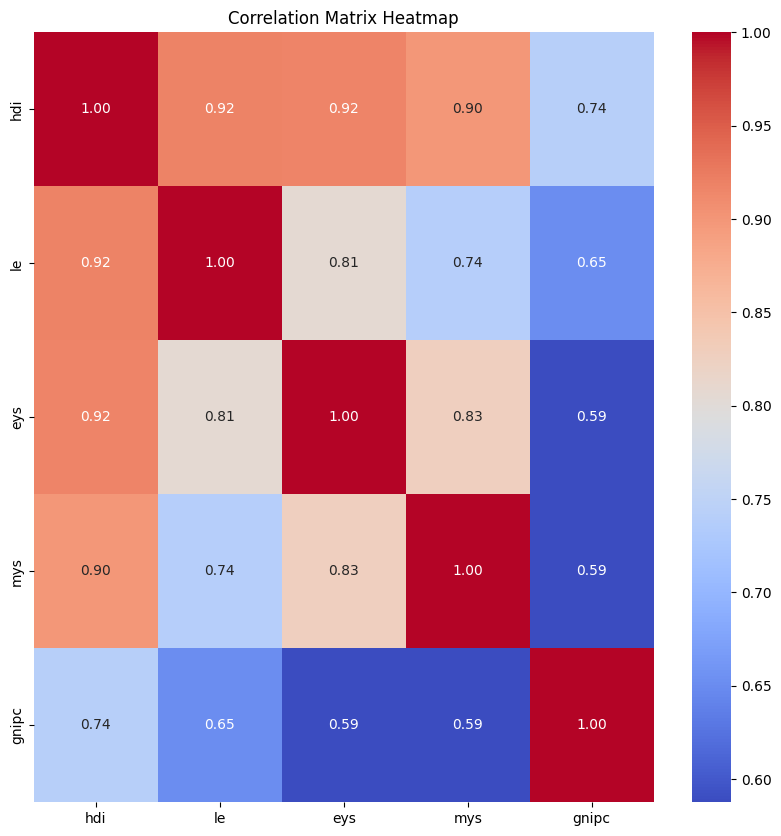

In [130]:
corr_matrix = data[selected_predictors].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

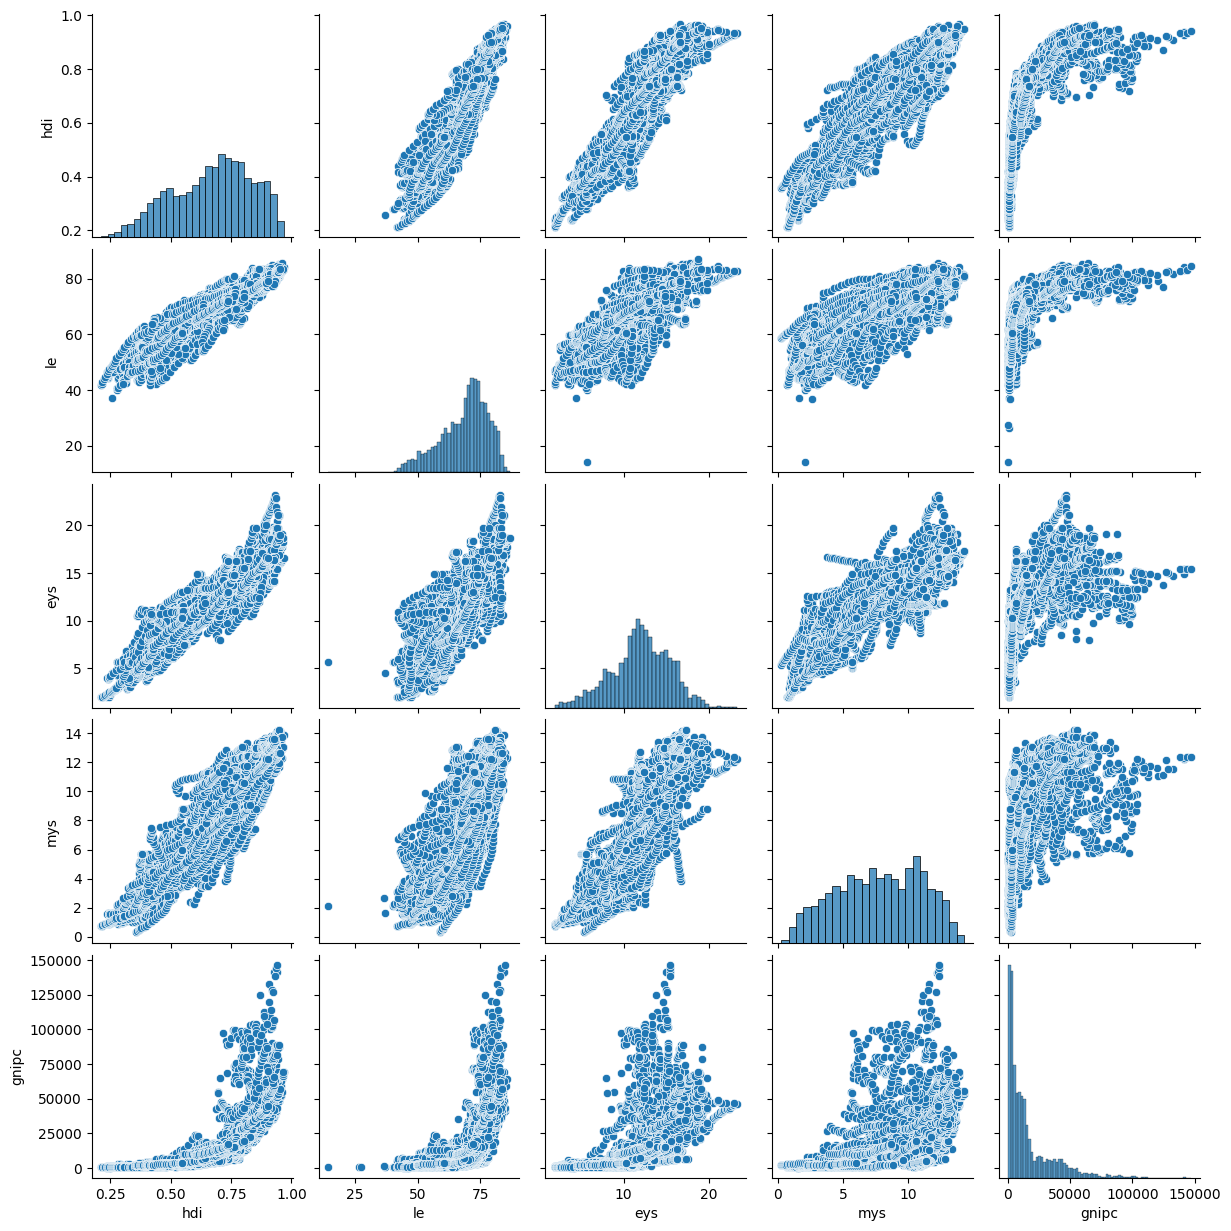

In [131]:
sns.pairplot(data[selected_predictors])
plt.show()

## Distribution of data

In [96]:
data.describe().T

count          mean           std          min          25%  \
year   6798.0   2006.000000      9.522605  1990.000000  1998.000000   
hdi    6171.0      0.670293      0.164414     0.212000     0.546500   
le     6798.0     68.544884      9.501335    14.098000    62.687250   
eys    6550.0     11.980679      3.430510     1.942090     9.966379   
mys    6254.0      7.745740      3.253551     0.290000     5.224195   
gnipc  6659.0  16792.035516  19554.848108   415.682568  3395.164727   

               50%           75%            max  
year   2006.000000   2014.000000    2022.000000  
hdi       0.692000      0.797000       0.967000  
le       70.491500     75.419894      86.895000  
eys      12.072135     14.474123      23.247681  
mys       7.852837     10.507150      14.255940  
gnipc  9589.807294  22494.183830  146673.241500

### Univariate distributions

In [97]:
# drop nan values in region
data_region = data.dropna(subset=['region'])

In [98]:
unique_regions = data_region["region"].unique()
region_colors = sns.color_palette("hls", len(unique_regions))

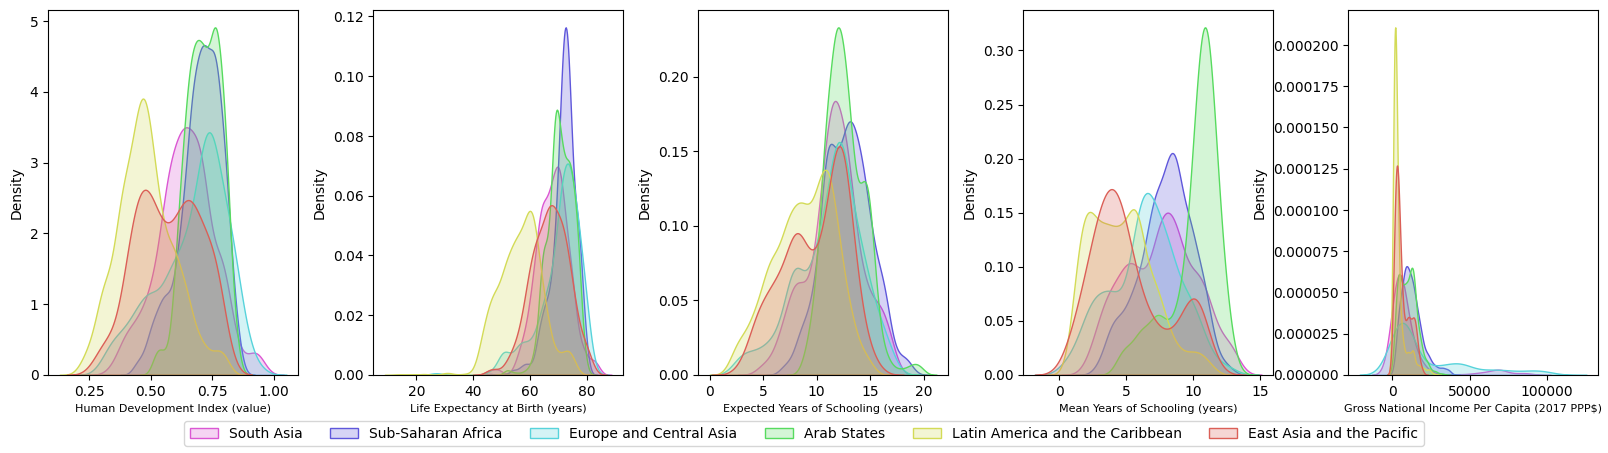

In [99]:
# Create a 4x6 grid of subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

# Loop through the features and plot each one as a subplot
for i, feature in enumerate(selected_predictors):
    sns.kdeplot(x=data_region[feature], hue=data_region["region"], ax=ax[i], legend=False, fill=True, common_norm=False, palette=region_colors)
    ax[i].set_xlabel(meta_dict[feature], fontsize=8)
    ax[i].set_ylabel("Density", fontsize=10)

# fig.legend(unique_regions ,loc='upper center', ncol=len(unique_regions), fontsize=8)
fig.legend(unique_regions, loc='lower center', ncol=len(unique_regions), bbox_transform=fig.transFigure)
plt.subplots_adjust(wspace=0.3, hspace=0.4, bottom=0.15)
plt.show()

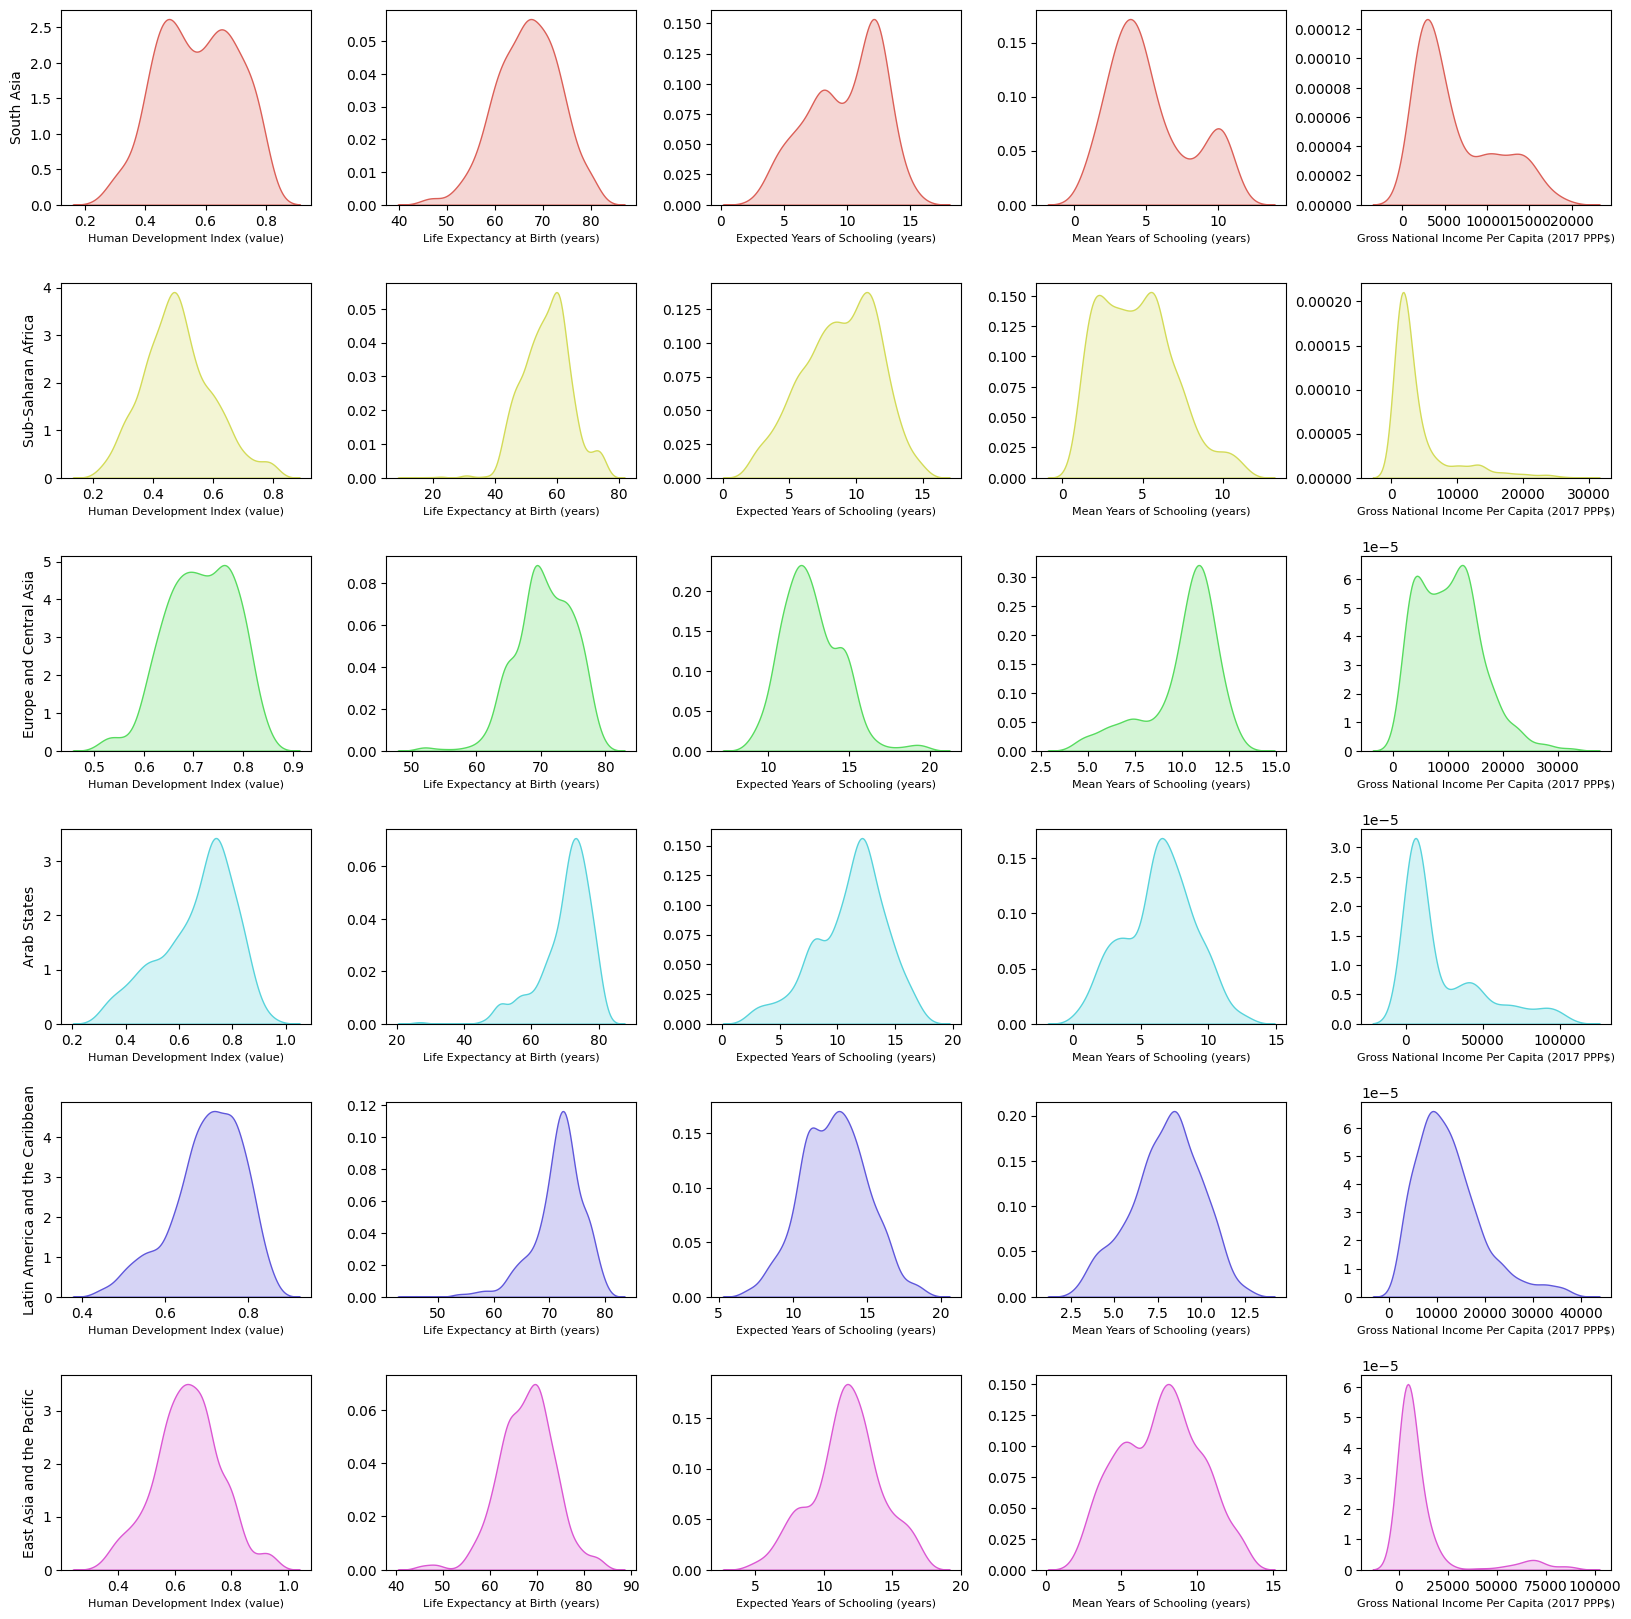

In [100]:
fig, ax = plt.subplots(6, 5, figsize=(20, 20))

# Loop through the regions and plot each one as a row
for i, region in enumerate(unique_regions):
    # Loop through the features and plot each one as a subplot
    for j, feature in enumerate(selected_predictors):
        sns.kdeplot(x=data[data["region"] == region][feature], ax=ax[i, j], color=region_colors[i], legend=False, fill=True, common_norm=False)
        ax[i, j].set_xlabel(meta_dict[feature], fontsize=8)
        if j == 0:
            ax[i, j].set_ylabel(region, fontsize=10)
        else:
            ax[i, j].set_ylabel("")

plt.subplots_adjust(wspace=0.3, hspace=0.4, bottom=0.10)
plt.show()


### Bivariate distributions

In [101]:
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

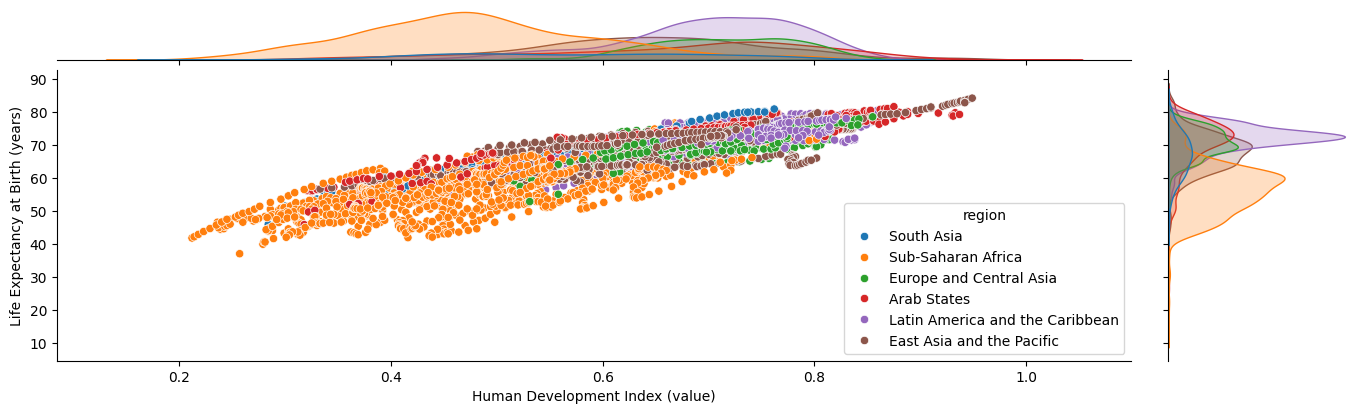

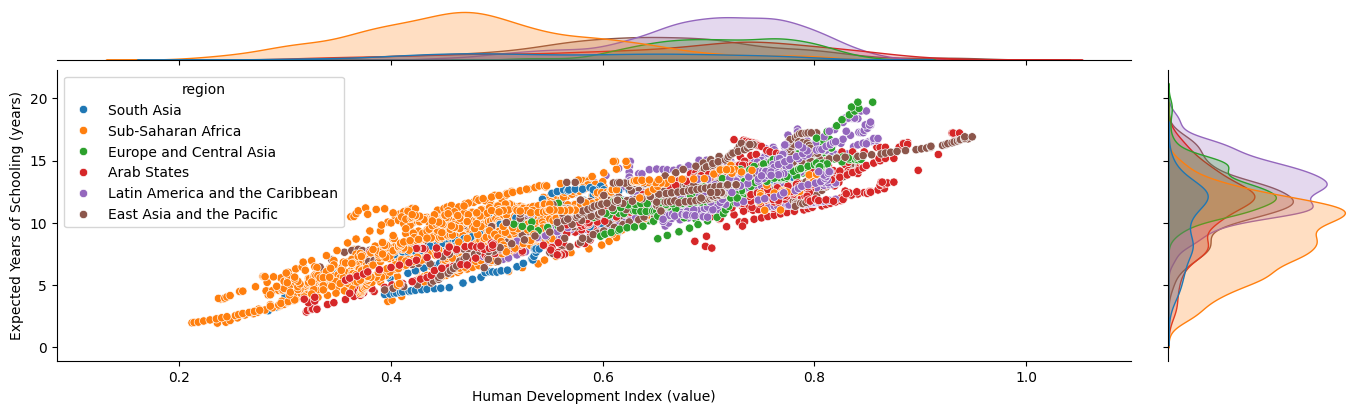

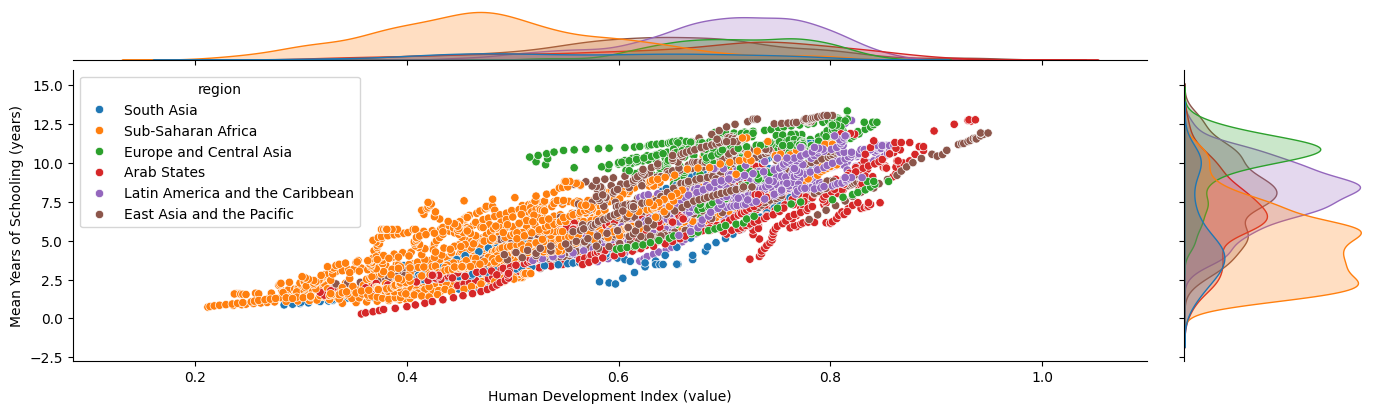

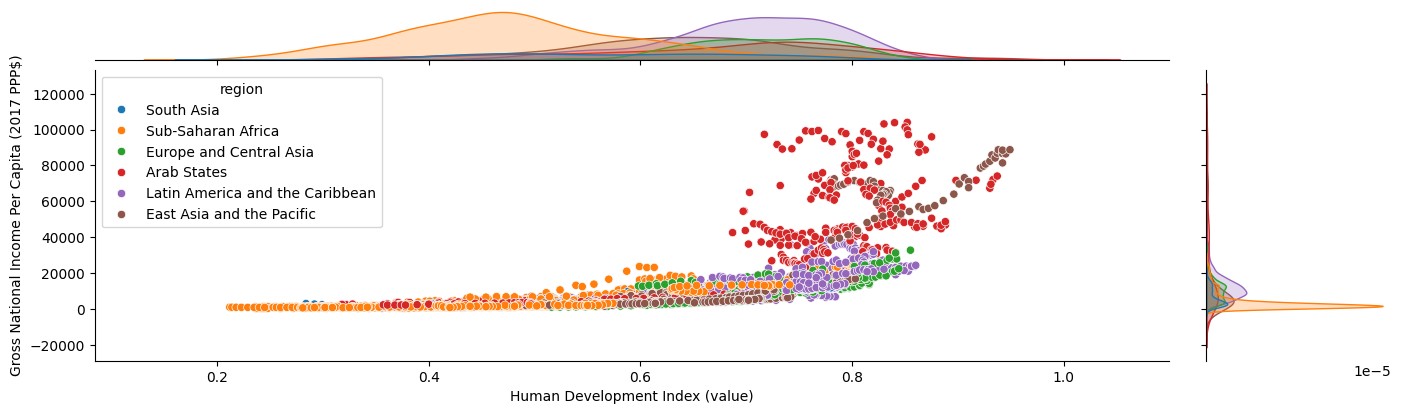

In [102]:
measures = ['le', 'eys', 'mys', 'gnipc']

for y in measures:
    g = sns.jointplot(data=data_region, x="hdi", y=y, hue="region")
    g.fig.set_size_inches((15, 4))
    g.set_axis_labels(meta_dict['hdi'], meta_dict[y])

# HDI Analysis

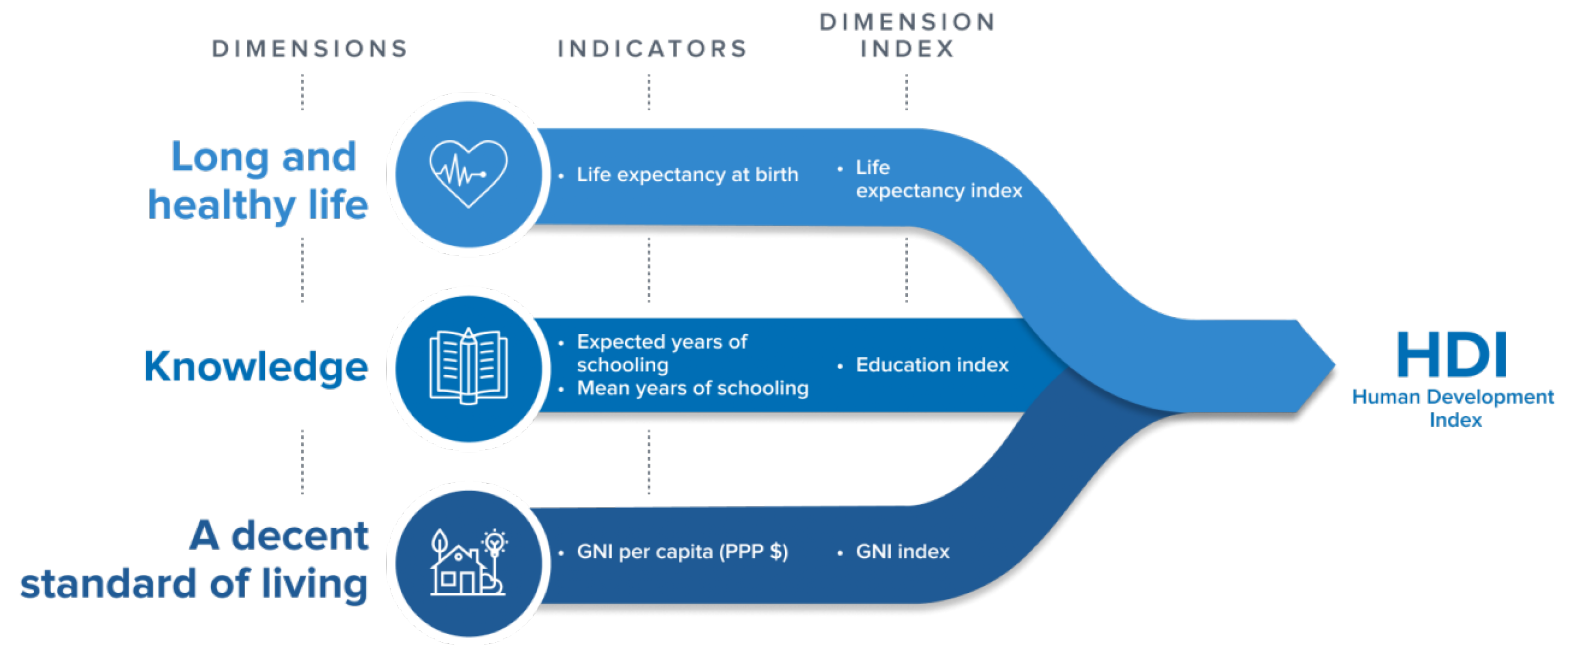

In [103]:
img_path = "Human Development Index Roadmap.png"
img = plt.imread(img_path)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### HDI

In [104]:
regions = ['AS', 'EAP', 'ECA', 'LAC', 'SA', 'SSA']

data_by_region = data[data['iso3'].isin(regions)]

fig = px.line(data_by_region,
               x='year',
               y='hdi',
               color='country',
               symbol='country',
               labels={'year': 'Year', 'hdi': 'HDI', 'country': 'Region'},
               template='plotly_white',
               title='HDI Over Time by Region')
fig.show()

In [105]:
fig = px.choropleth(data,
                    locations="country",
                    locationmode='country names',
                    animation_frame="year",
                    animation_group="country",
                    color="hdi",
                    labels={"hdi": "HDI"},
                    color_continuous_scale="Viridis",
                    )
fig.update_layout(title_text='Global Human Development Index (HDI) over time')
fig.show()

In [106]:
def top_country_plot(data, feature, year_1, year_2, n=10, sort=False):
    df_1 = data.query(f"year=={year_1}")
    df_2 = data.query(f"year=={year_2}")
    # df_3 = data.query(f"year=={year_3}")

    top_countries_1 = df_1.sort_values(by=feature, ascending=sort).head(n)
    top_countries_2 = df_2.sort_values(by=feature, ascending=sort).head(n)
    # top_countries_3 = df_3.sort_values(by=feature, ascending=top).head(n)

    # fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))


    sns.barplot(data=top_countries_1, x=feature, y='country', palette='blend:#7AB,#EDA', ax=ax1)
    if sort==False:
        ax1.set_title('Top ' + str(n) + ' Countries by ' + meta_dict[feature] + ' in ' + str(year_1))
    else:
        ax1.set_title('Top ' +  str(n) + ' Countries by Lowest ' + meta_dict[feature] + ' in ' + str(year_1))
    for i in range(top_countries_1.shape[0]):
        ax1.text(top_countries_1[feature].iloc[i], i, round(top_countries_1[feature].iloc[i], 2), va='center')

    ax1.set_xlabel(meta_dict[feature])
    ax1.set_ylabel('')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    sns.barplot(data=top_countries_2, x=feature, y='country', palette='blend:#7AB,#EDA', ax=ax2)
    if sort==False:
        ax2.set_title('Top ' + str(n) + ' Countries by ' + meta_dict[feature] + ' in ' + str(year_2))
    else:
        ax2.set_title('Top ' + str(n) + ' Countries by Lowest ' + meta_dict[feature] + ' in ' + str(year_2))
    for i in range(top_countries_1.shape[0]):
        ax2.text(top_countries_1[feature].iloc[i], i, round(top_countries_1[feature].iloc[i], 2), va='center')

    ax2.set_xlabel(meta_dict[feature])
    ax2.set_ylabel('')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    plt.subplots_adjust(wspace=0.5)
    plt.show()

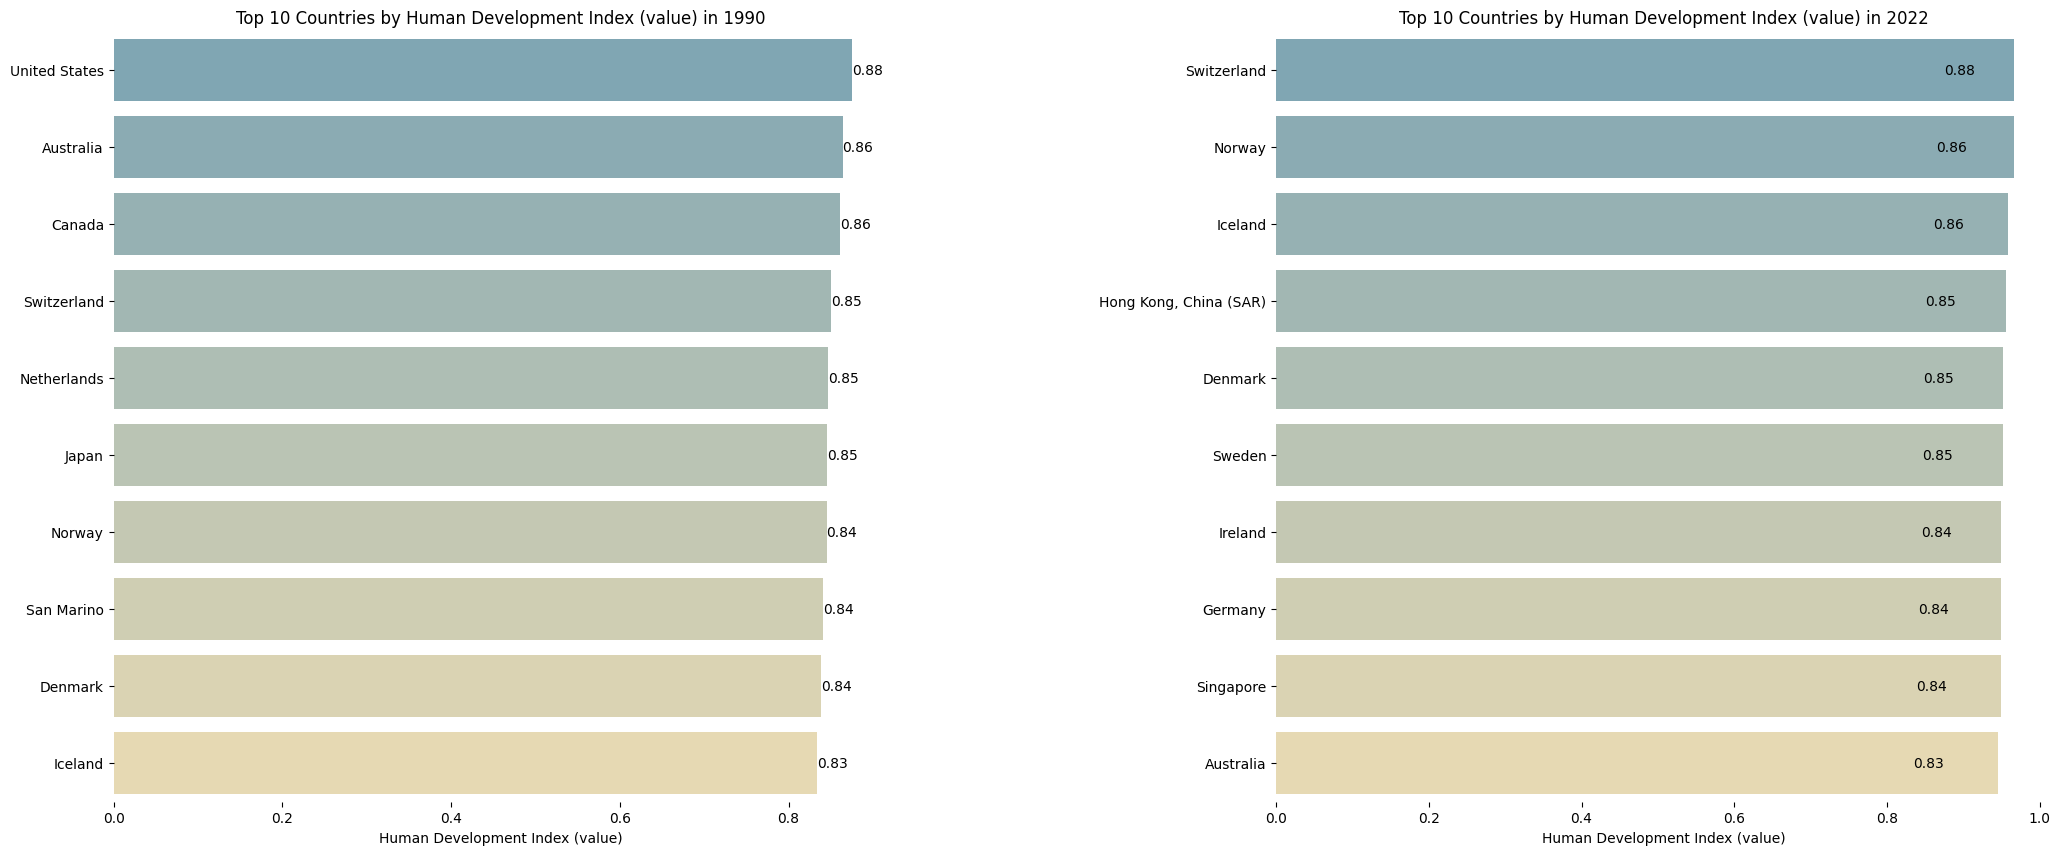

In [107]:
top_country_plot(data, 'hdi', 1990, 2022, n=10, sort=False)

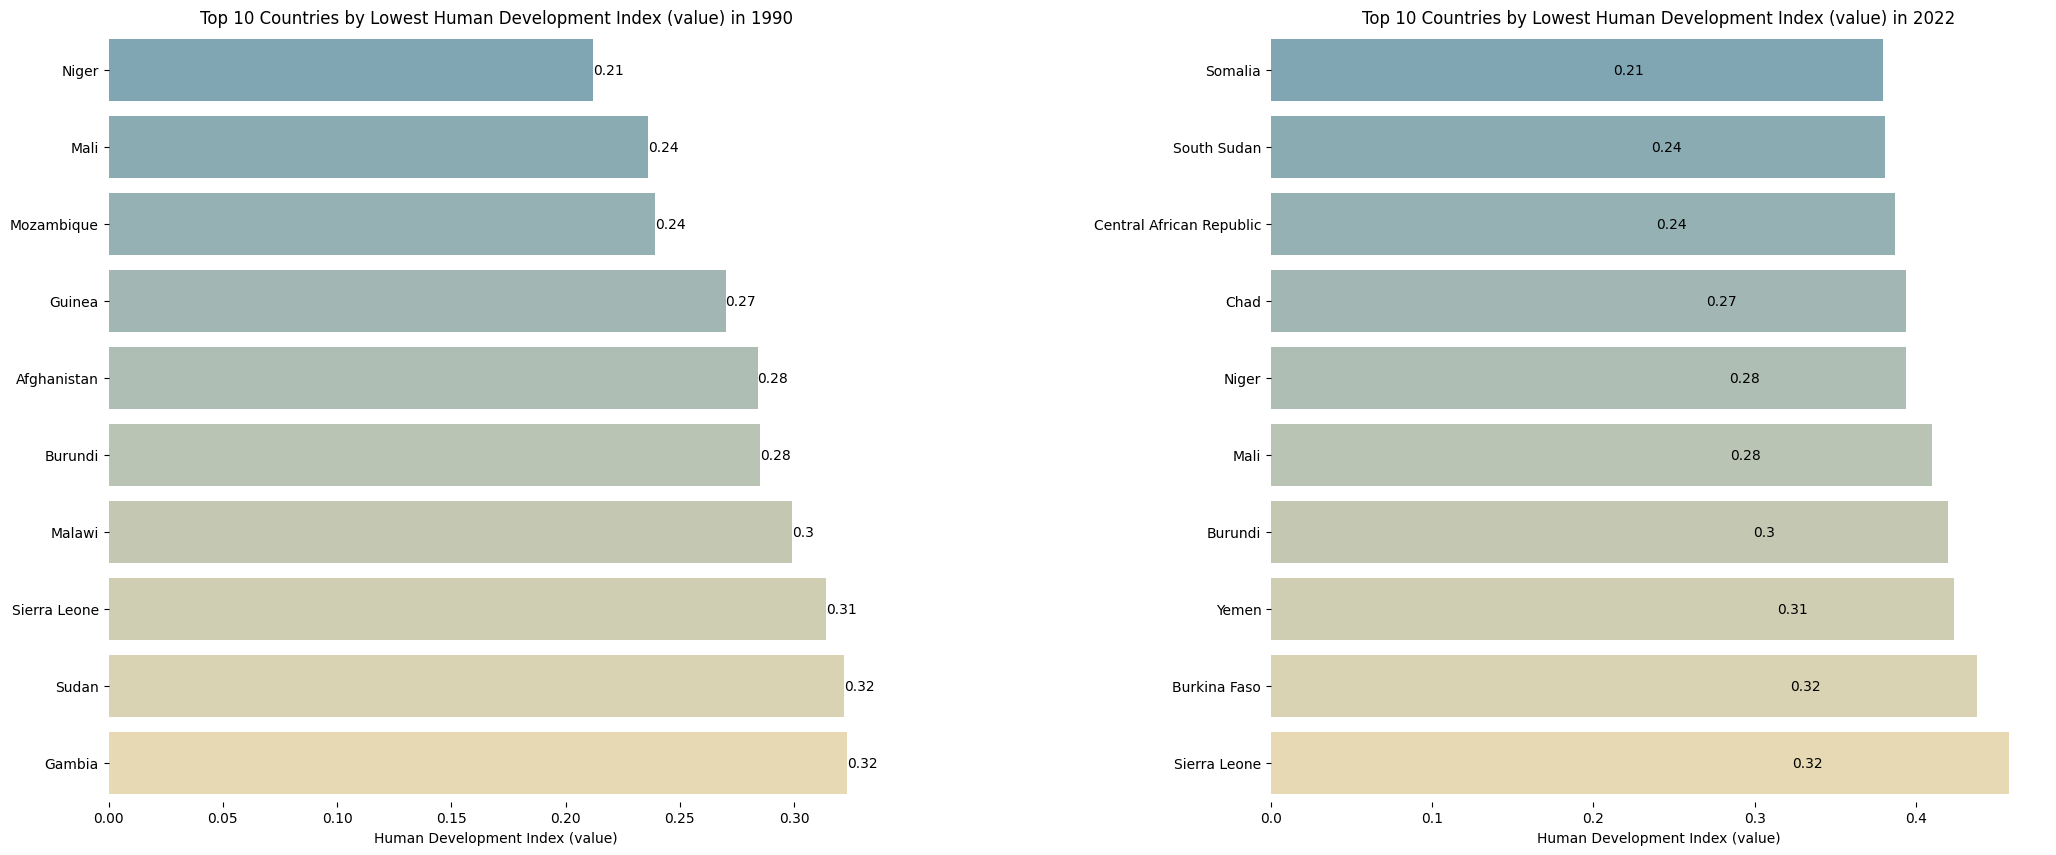

In [108]:
top_country_plot(data, 'hdi', 1990, 2022, n=10, sort=True)

### Long and Healthy Life: Life Expectancy

In [109]:
fig = px.line(data_by_region,
               x='year',
               y='le',
               color='country',
               symbol='country',
               labels={'year': 'Year', 'le': meta_dict['le'], 'country': 'Region'},
               template='plotly_white',
               title= meta_dict['le'] + ' Over Time by Region')
fig.show()

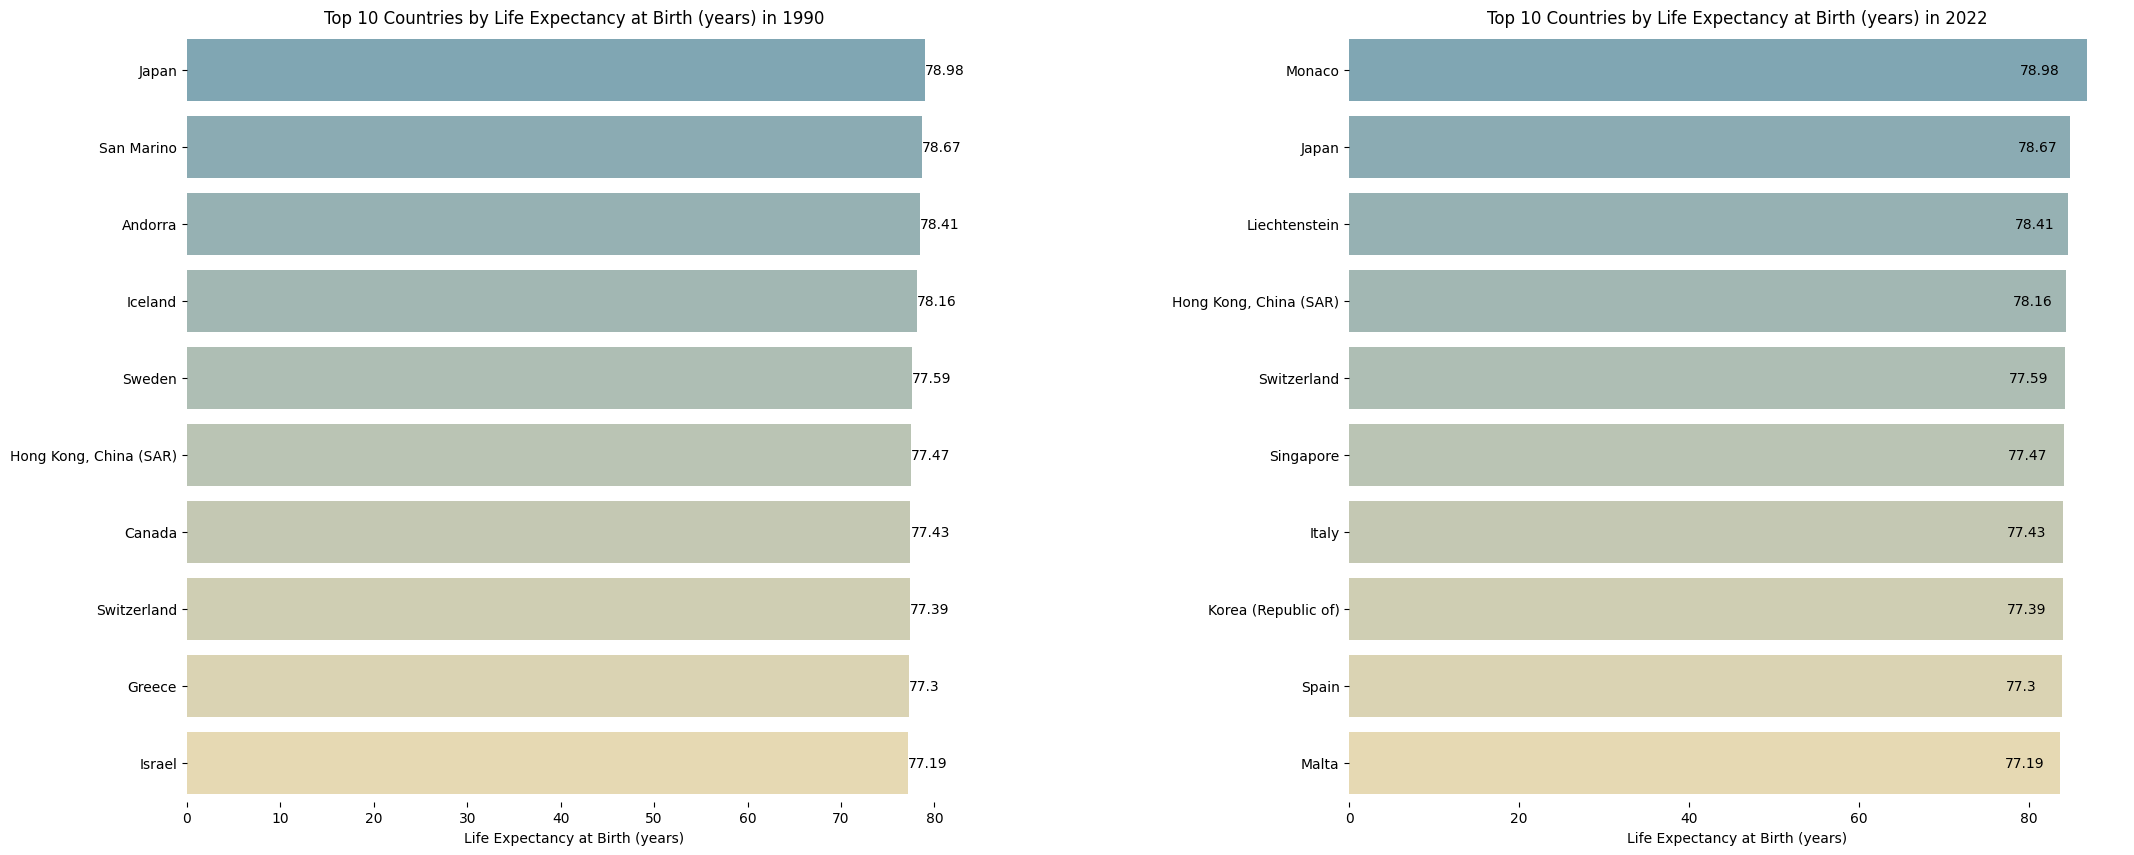

In [110]:
top_country_plot(data, 'le', 1990, 2022, n=10, sort=False)

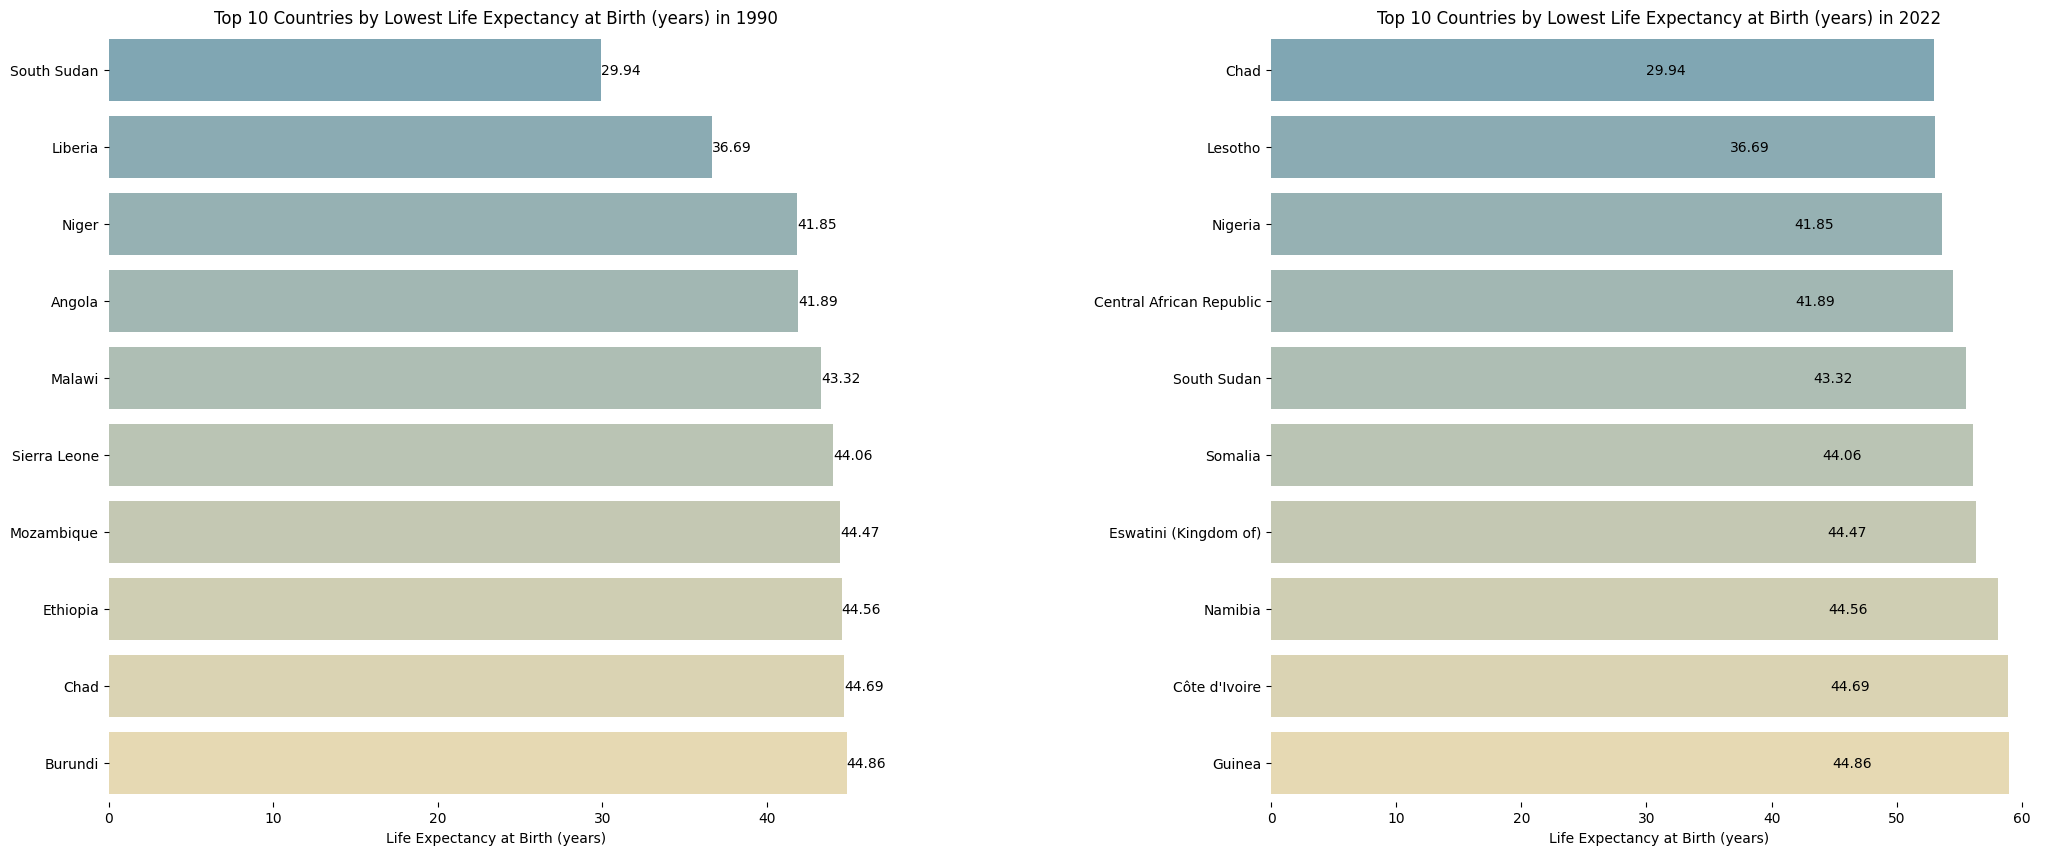

In [111]:
top_country_plot(data, 'le', 1990, 2022, n=10, sort=True)

#### HDI vs Life Expectancy

In [112]:
fig = px.scatter(data,
                 x="hdi",
                 y="le",
                #  size="le",
                 animation_frame="year",
                 animation_group="country",
                 color="region",
                 hover_name="country",
                 labels={"hdi": meta_dict["hdi"], "le": meta_dict["le"], "region": meta_dict["region"]},
                 )

fig.update_layout(xaxis_range=[0.2, 1])
fig.update_layout(yaxis_range=[35, 90])
fig.show()


In [113]:
## Calculate the Pearson Correlation Coefficient of HDI and LE
def pearson_corr(data, feature_1, feature_2):
    corr = data[feature_1].corr(data[feature_2])
    return corr

## Check significance of the correlation

from scipy.stats import pearsonr
def pearson_corr_pval(data, feature_1, feature_2):
    # remove missing values
    filter_data = data.dropna(subset=[feature_1, feature_2])
    corr, pval = pearsonr(filter_data[feature_1], filter_data[feature_2])
    return pval

In [114]:
corr = pearson_corr(data, 'hdi', 'le')
print('The Pearson Correlation Coefficient of HDI and LE is:', round(corr, 2))

pval = pearson_corr_pval(data, 'hdi', 'le')
print('The p-value of the Pearson Correlation Coefficient of HDI and LE is:', round(pval, 4))

The Pearson Correlation Coefficient of HDI and LE is: 0.92
The p-value of the Pearson Correlation Coefficient of HDI and LE is: 0.0


### Education: Expected Years of Schooling and Mean Years of Schooling

#### Expected Years of Schooling

In [115]:
fig = px.line(data_by_region,
               x='year',
               y='eys',
               color='country',
               symbol='country',
               labels={'year': 'Year', 'eys': meta_dict['eys'], 'country': 'Region'},
               template='plotly_white',
               title=meta_dict['eys'] + ' Over Time by Region')
fig.show()

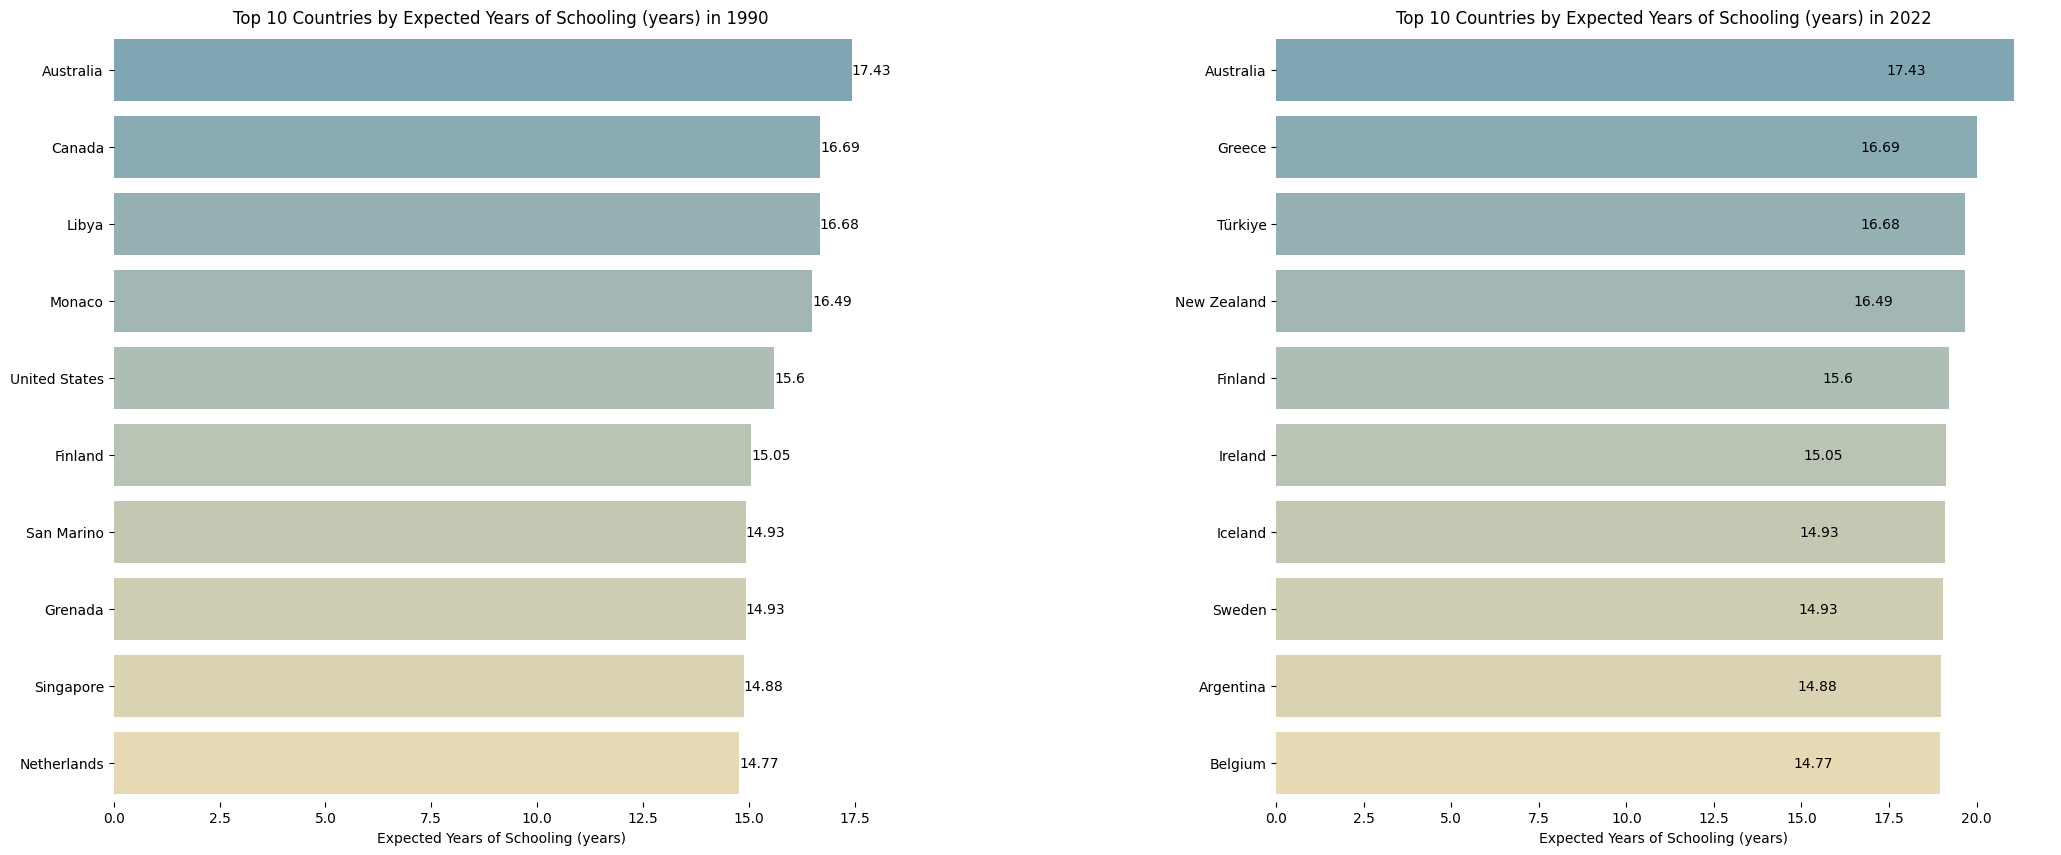

In [116]:
top_country_plot(data, 'eys', 1990, 2022, n=10, sort=False)

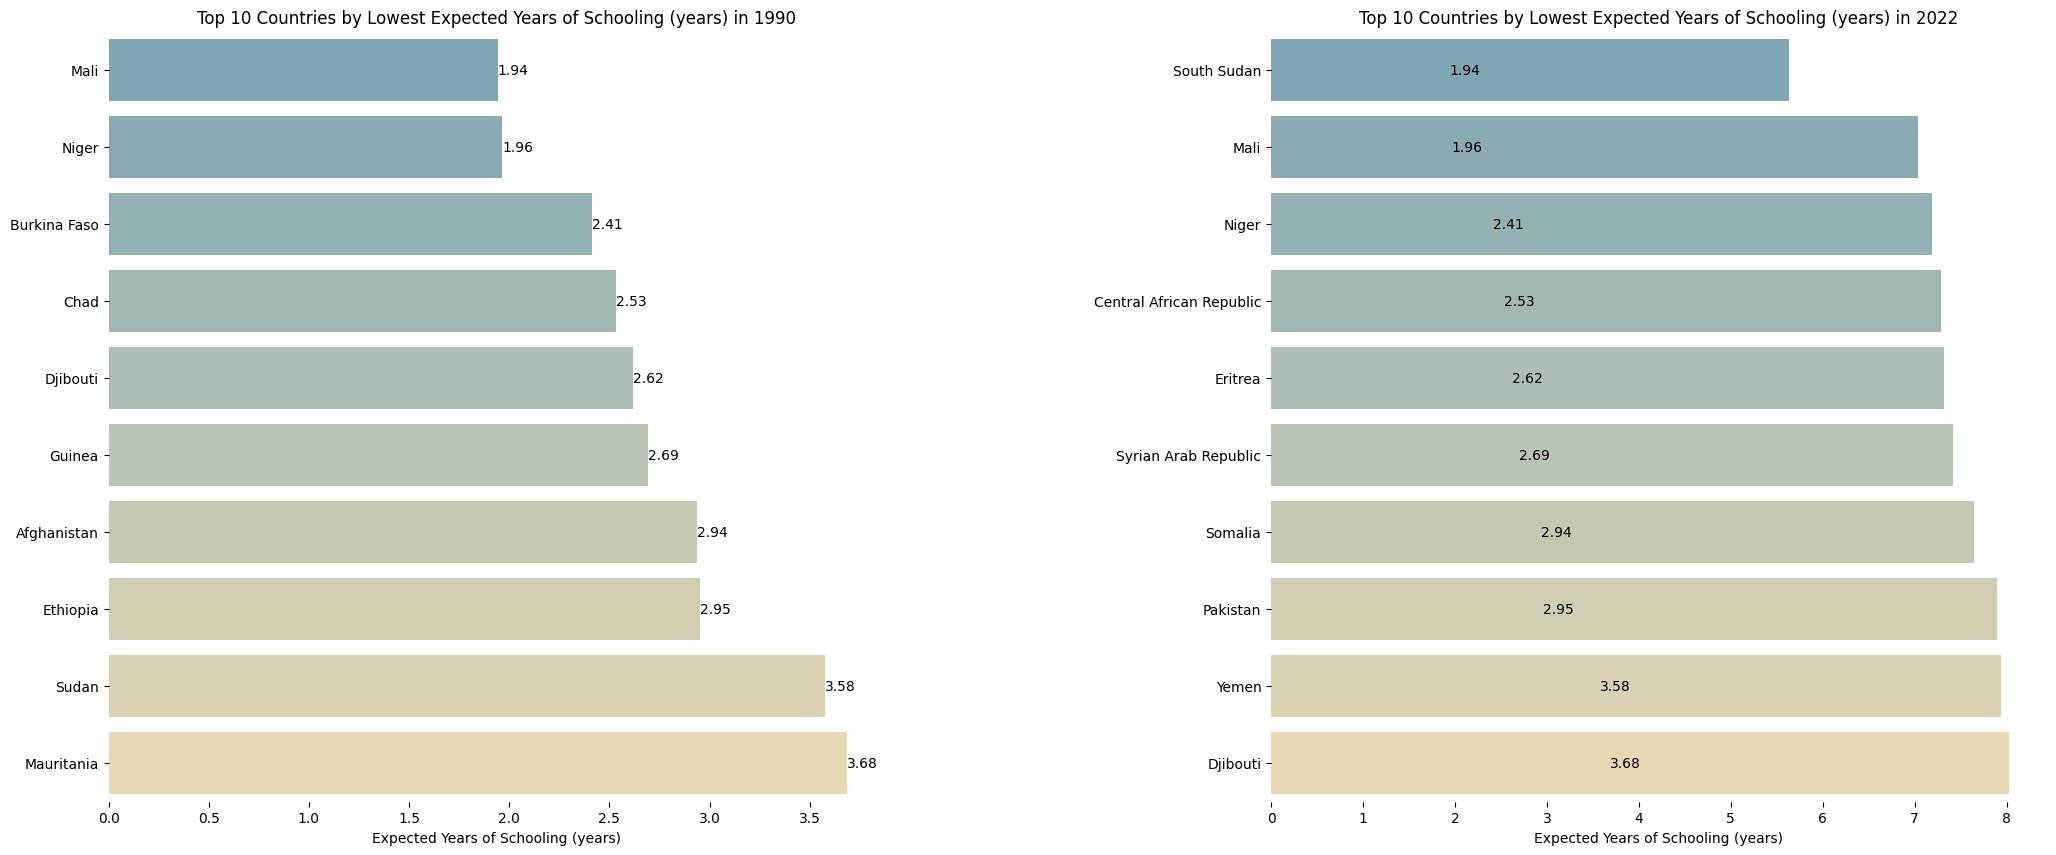

In [117]:
top_country_plot(data, 'eys', 1990, 2022, n=10, sort=True)

#### Mean Years of Schooling

In [118]:
fig = px.line(data_by_region,
               x='year',
               y='mys',
               color='country',
               symbol='country',
               labels={'year': 'Year', 'mys': meta_dict['mys'], 'country': 'Region'},
               template='plotly_white',
               title=meta_dict['mys'] + ' Over Time by Region')
fig.show()

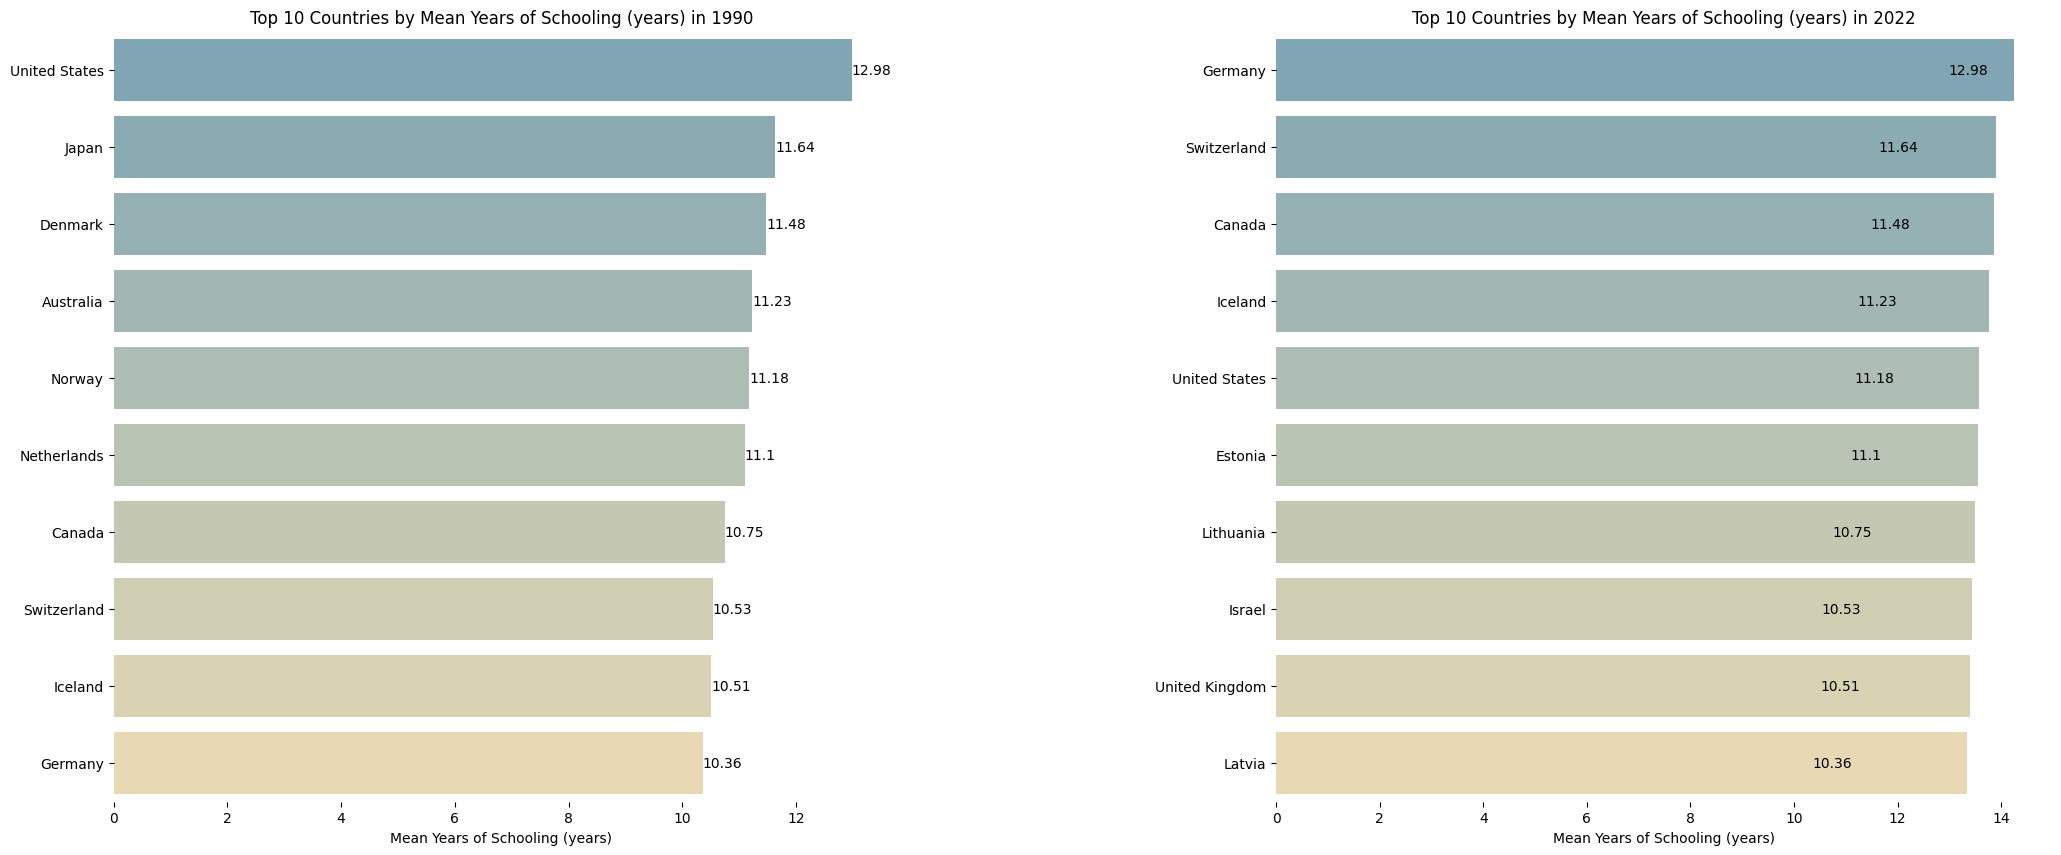

In [119]:
top_country_plot(data, 'mys', 1990, 2022, n=10, sort=False)

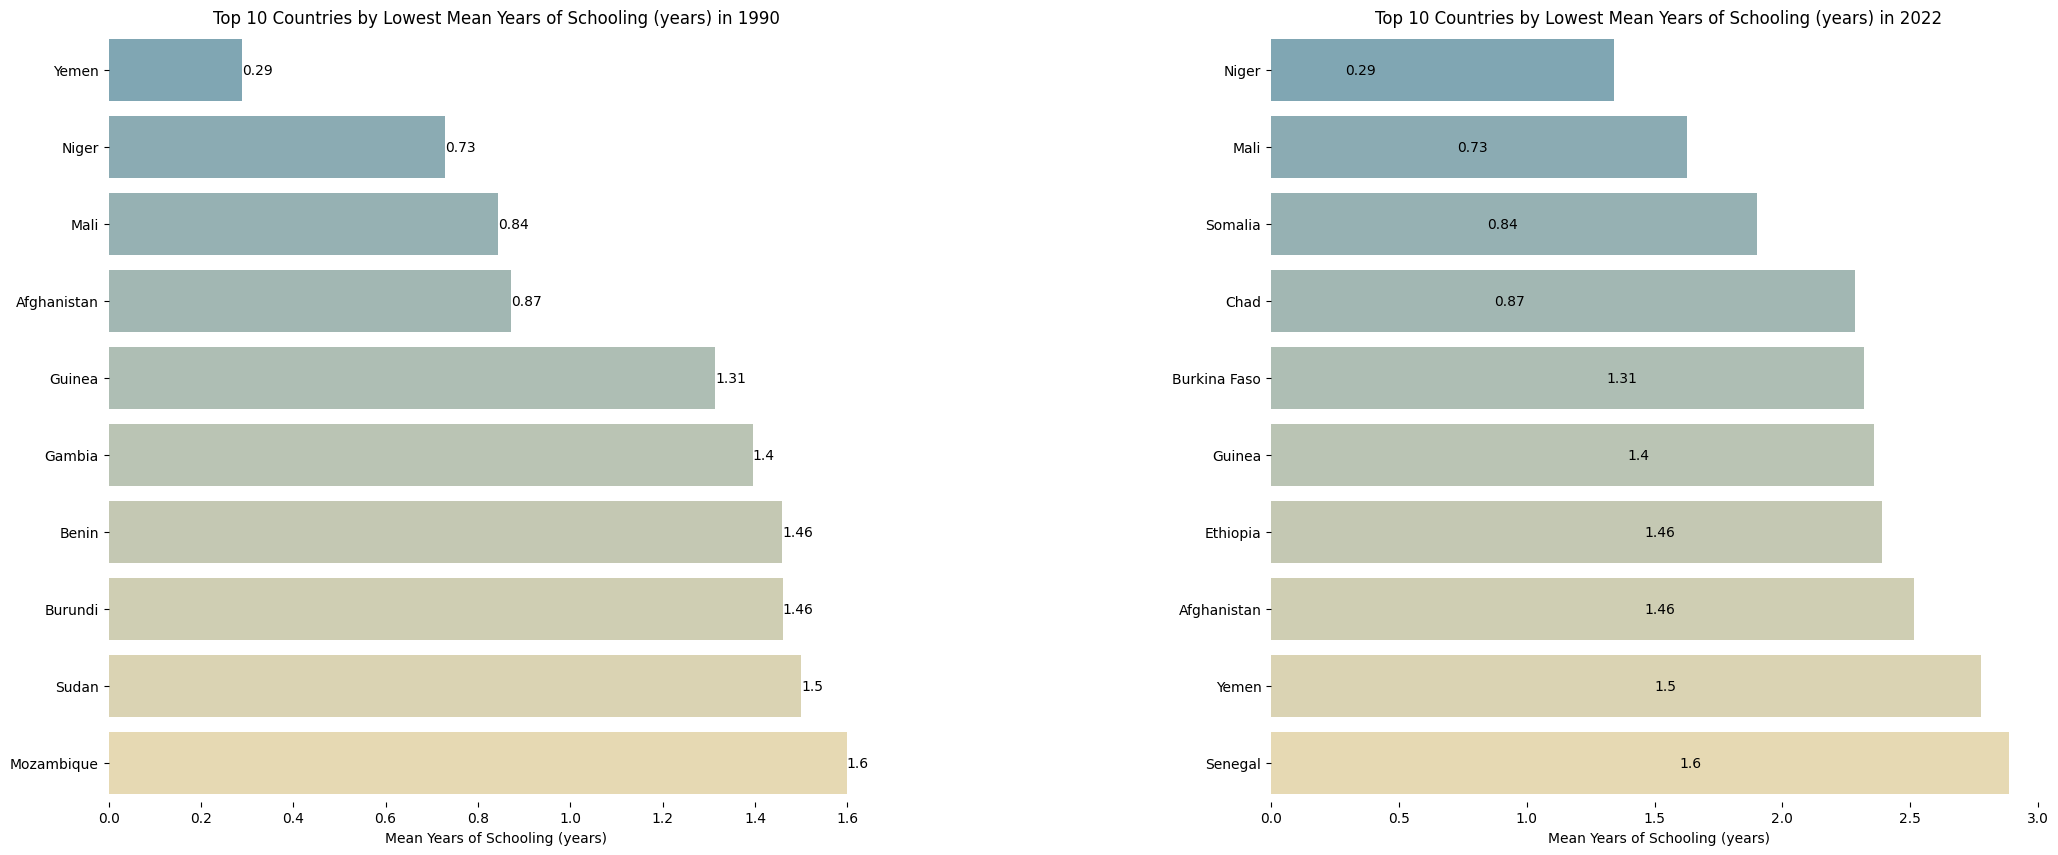

In [120]:
top_country_plot(data, 'mys', 1990, 2022, n=10, sort=True)

#### HDI vs Education

In [121]:
fig = px.scatter(data,
                 x="hdi",
                 y="eys",
                 animation_frame="year",
                 animation_group="country",
                 color="region",
                 hover_name="country",
                 labels={"hdi": meta_dict["hdi"], "eys": meta_dict["eys"], "region": meta_dict["region"]},
                 )

fig.update_layout(xaxis_range=[0.2, 1])
fig.update_layout(yaxis_range=[0, 25])
fig.show()


In [122]:
corr = pearson_corr(data, 'hdi', 'eys')
print('The Pearson Correlation Coefficient of HDI and Expected Years of Scholing is:', round(corr, 2))

pval = pearson_corr_pval(data, 'hdi', 'eys')
print('The p-value of the Pearson Correlation Coefficient of HDI and Expected Years of Scholing is:', round(pval, 4))


The Pearson Correlation Coefficient of HDI and Expected Years of Scholing is: 0.92
The p-value of the Pearson Correlation Coefficient of HDI and Expected Years of Scholing is: 0.0


In [123]:
fig = px.scatter(data,
                 x="hdi",
                 y="mys",
                 animation_frame="year",
                 animation_group="country",
                 color="region",
                 hover_name="country",
                 labels={"hdi": meta_dict["hdi"], "mys": meta_dict["mys"], "region": meta_dict["region"]},
                 )

fig.update_layout(xaxis_range=[0.2, 1])
fig.update_layout(yaxis_range=[0, 15])
fig.show()

In [124]:
corr = pearson_corr(data, 'hdi', 'mys')
print('The Pearson Correlation Coefficient of HDI and Mean Years of Scholing is:', round(corr, 2))

pval = pearson_corr_pval(data, 'hdi', 'mys')
print('The p-value of the Pearson Correlation Coefficient of HDI and Mean Years of Scholing is:', round(pval, 4))

The Pearson Correlation Coefficient of HDI and Mean Years of Scholing is: 0.9
The p-value of the Pearson Correlation Coefficient of HDI and Mean Years of Scholing is: 0.0


### Income: Gross National Income (GNI) per Capita

In [125]:
fig = px.line(data_by_region,
               x='year',
               y='gnipc',
               color='country',
               symbol='country',
               labels={'year': 'Year', 'gnipc': meta_dict['gnipc'], 'country': 'Region'},
               template='plotly_white',
               title=meta_dict['gnipc'] + ' Over Time by Region')
fig.show()

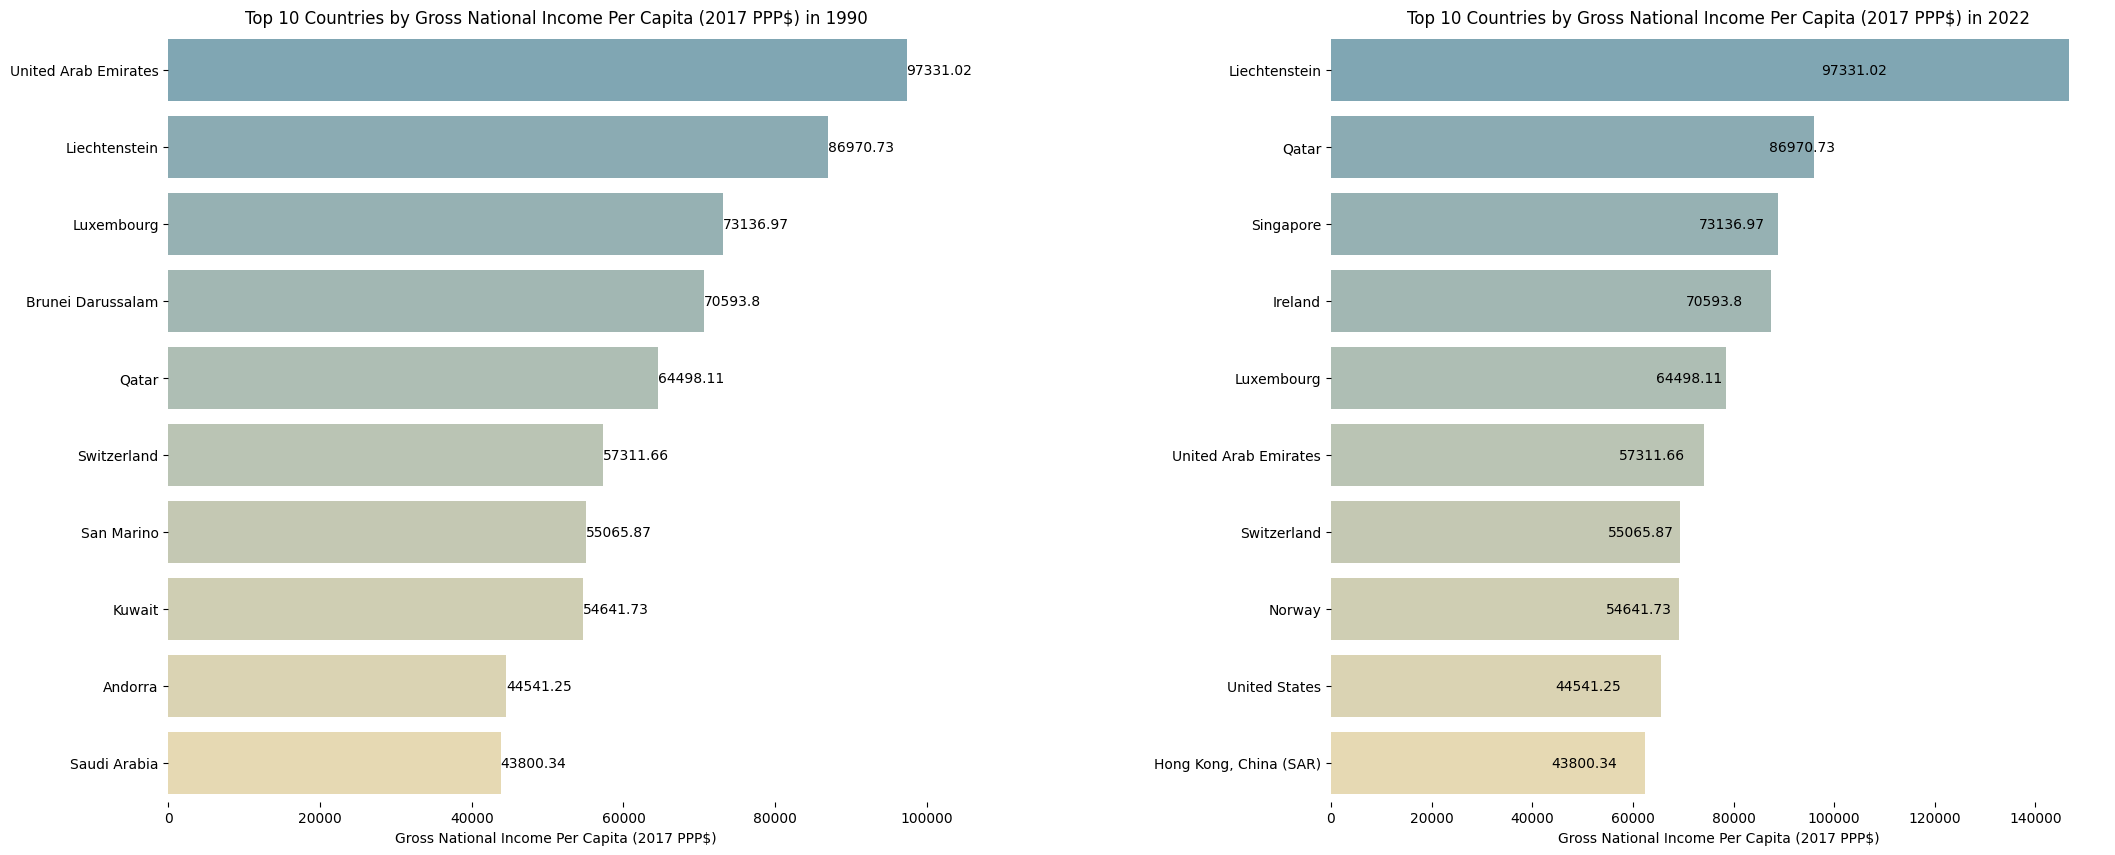

In [126]:
top_country_plot(data, 'gnipc', 1990, 2022, n=10, sort=False)

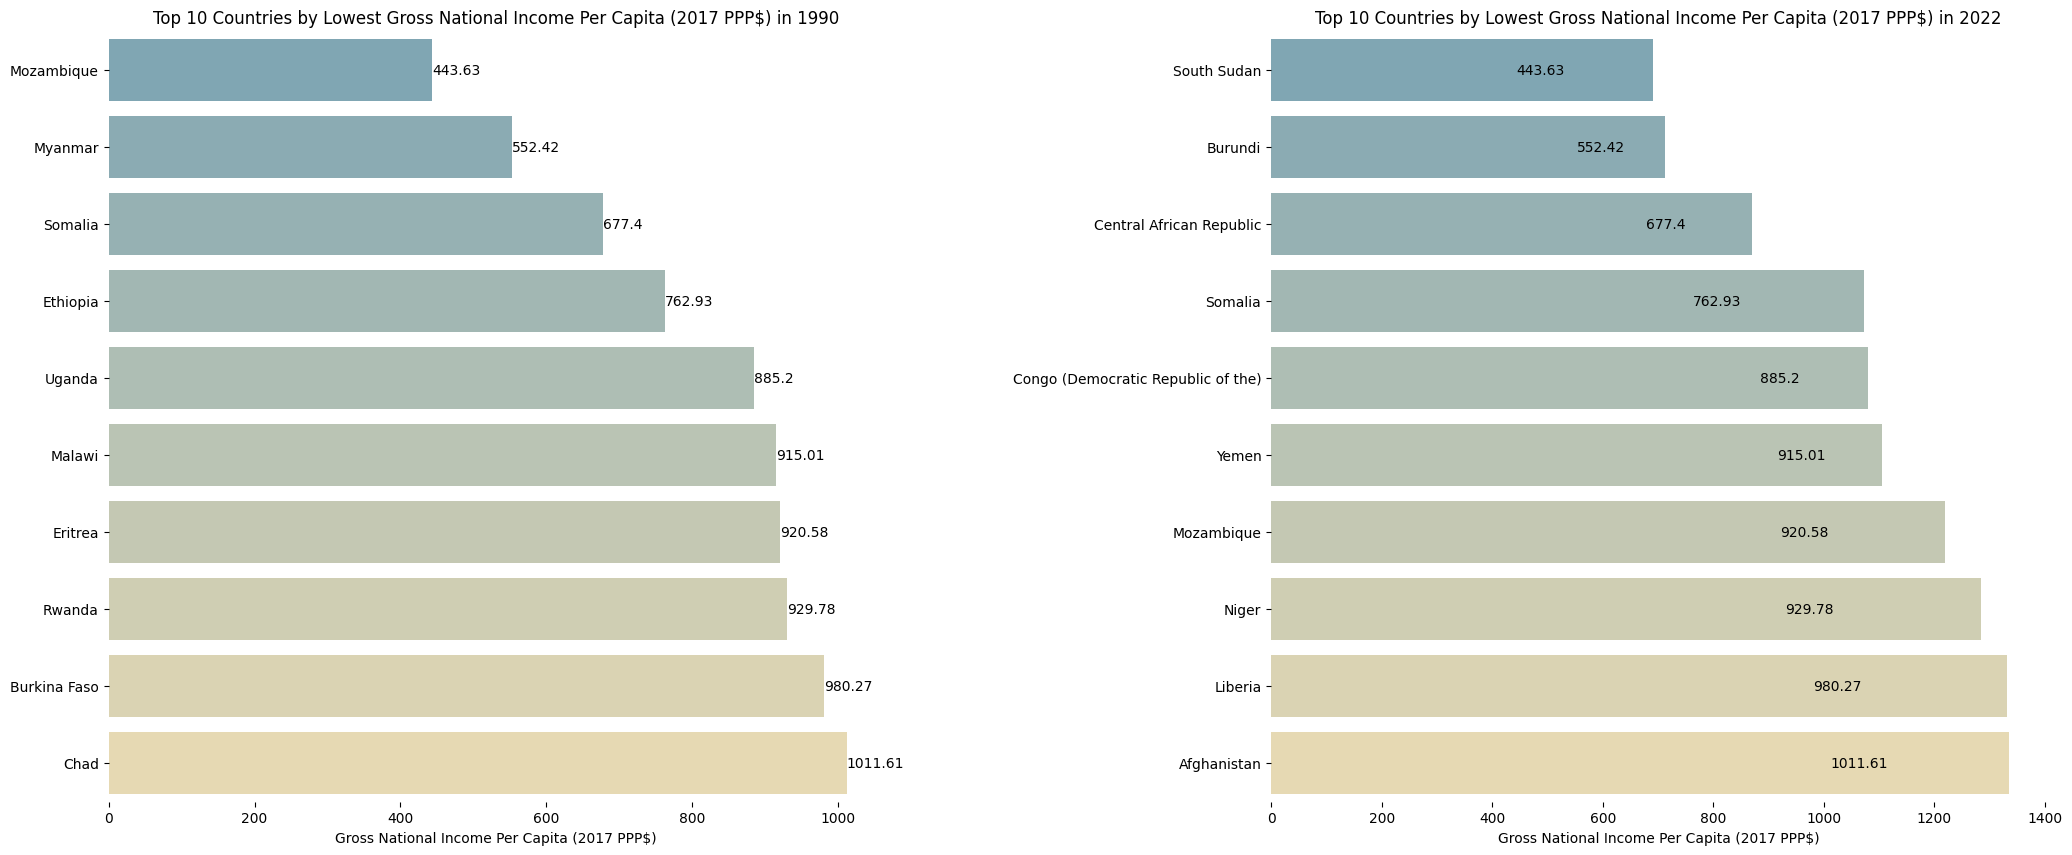

In [127]:
top_country_plot(data, 'gnipc', 1990, 2022, n=10, sort=True)

#### HDI vs GNI per Capita

In [128]:
fig = px.scatter(data,
                 x="hdi",
                 y="gnipc",
                 animation_frame="year",
                 animation_group="country",
                 color="region",
                 hover_name="country",
                 labels={"hdi": meta_dict["hdi"], "gnipc": meta_dict["gnipc"], "region": meta_dict["region"]},
                 )

fig.update_layout(xaxis_range=[0.2, 1])
fig.update_layout(yaxis_range=[-1000, 100000])
fig.show()

In [129]:
corr = pearson_corr(data, 'hdi', 'gnipc')
print('The Pearson Correlation Coefficient of HDI and GNI per Capita is:', round(corr, 2))

pval = pearson_corr_pval(data, 'hdi', 'gnipc')
print('The p-value of the Pearson Correlation Coefficient of HDI and GNI per Capita is:', round(pval, 4))

The Pearson Correlation Coefficient of HDI and GNI per Capita is: 0.74
The p-value of the Pearson Correlation Coefficient of HDI and GNI per Capita is: 0.0
